# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 

In [172]:
warnings.simplefilter("ignore")

In [173]:
df = pd.read_csv("climate_change_data.csv") #putting the downloaded data into a dataframe

df.head() #get a sense of what the data looks like

Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404983       -0.475931       5.193341  47.467938   
4    13.210885     410.472999        1.135757      78.695280  61.789672   

   Wind Speed  
0   18.492026  
1   34.249300  
2   34.124261  
3    8.554563  
4    8.001164

In [174]:
# Renaming columns for easier comprehension, and also ability to call them later (so we need to eliminate the spaces)
df = df.rename(columns={"CO2 Emissions": "CO2_Emissions", "Sea Level Rise": "Sea_Level_Rise", "Wind Speed": "Wind_Speed"})

In [175]:
print("Min Date:", df['Date'].min())
print("Max Date:", df['Date'].max())
#checking to make sure the bin process captures all dates and reduces potential missing data spots

Min Date: 2000-01-01 00:00:00.000000000
Max Date: 2022-12-31 00:00:00.000000000


In [176]:

df['Date'] = pd.to_datetime(df['Date'])

# Define bins as datetime values
bins = [
    pd.Timestamp(2000, 1, 1),
    pd.Timestamp(2005, 1, 1),
    pd.Timestamp(2010, 1, 1),
    pd.Timestamp(2015, 1, 1),
    pd.Timestamp(2020, 1, 1),
    pd.Timestamp(2023, 1, 1)
]

group_names = ['2000-2005', '2005-2010', '2010-2015', '2015-2020', '2020-2023']

df['DateBins'] = pd.cut(df['Date'], bins=bins, labels=group_names, right=False)

#new fancy way of making date bins!

In [177]:
#import country to continent list
from io import StringIO

# Raw data
data = """Continent,Country
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
Africa,Burundi
Africa,Cameroon
Africa,Cape Verde
Africa,Central African Republic
Africa,Chad
Africa,Comoros
Africa,Congo
Africa,"Congo, Democratic Republic of"
Africa,Djibouti
Africa,Egypt
Africa,Equatorial Guinea
Africa,Eritrea
Africa,Ethiopia
Africa,Gabon
Africa,Gambia
Africa,Ghana
Africa,Guinea
Africa,Cote d'Ivoire
Africa,Guinea-Bissau
Africa,Ivory Coast
Africa,Kenya
Africa,Lesotho
Africa,Liberia
Africa,Libya
Africa,Madagascar
Africa,Malawi
Africa,Mali
Africa,Mauritania
Africa,Mauritius
Africa,Morocco
Africa,Mozambique
Africa,Namibia
Africa,Niger
Africa,Nigeria
Africa,Rwanda
Africa,Sao Tome and Principe
Africa,Senegal
Africa,Seychelles
Africa,Sierra Leone
Africa,Somalia
Africa,South Africa
Africa,South Sudan
Africa,Sudan
Africa,Swaziland
Africa,Tanzania
Africa,Togo
Africa,Tunisia
Africa,Uganda
Africa,Zambia
Africa,Zimbabwe
Asia,Afghanistan
Asia,Bahrain
Asia,Bangladesh
Asia,Bhutan
Asia,Brunei
Asia,Burma (Myanmar)
Asia,Cambodia
Asia,China
Asia,East Timor
Asia,India
Asia, "British Indian Ocean Territory (Chagos Archipelago)"
Asia,Indonesia
Asia,Iran
Asia,Iraq
Asia,Israel
Asia,Japan
Asia,Jordan
Asia,Kazakhstan
Asia,"Korea, North"
Asia,"Korea, South"
Asia,Kuwait
Asia,Kyrgyzstan
Asia,Laos
Asia,Lebanon
Asia,Malaysia
Asia,Maldives
Asia,Mongolia
Asia,Nepal
Asia,Oman
Asia,Pakistan
Asia,Philippines
Asia,Qatar
Asia,Russian Federation
Asia,Saudi Arabia
Asia,Singapore
Asia,Sri Lanka
Asia,Syria
Asia,Tajikistan
Asia,Thailand
Asia,Turkey
Asia,Turkmenistan
Asia,United Arab Emirates
Asia,Uzbekistan
Asia,Vietnam
Asia,Yemen
Asia,Palestinian Territory
Europe,Albania
Europe,Andorra
Europe,Armenia
Europe,Austria
Europe,Azerbaijan
Europe,Belarus
Europe,Belgium
Europe,Bosnia and Herzegovina
Europe,Bulgaria
Europe,Croatia
Europe,Cyprus
Europe,Czech Republic
Europe,Denmark
Europe,Estonia
Europe,Finland
Europe,France
Europe,Georgia
Europe,Germany
Europe,Greece
Europe,Hungary
Europe,Iceland
Europe,Ireland
Europe,Italy
Europe,Latvia
Europe,Liechtenstein
Europe,Lithuania
Europe,Luxembourg
Europe,Macedonia
Europe,Malta
Europe,Moldova
Europe,Monaco
Europe,Montenegro
Europe,Netherlands
Europe,Norway
Europe,Poland
Europe,Portugal
Europe,Romania
Europe,San Marino
Europe,Serbia
Europe,"Slovakia (Slovak Republic)"
Europe,Slovenia
Europe,Spain
Europe,Sweden
Europe,Switzerland
Europe,Ukraine
Europe,United Kingdom
Europe, Holy See (Vatican City State)
North America,Antigua and Barbuda
North America,Bahamas
North America,Barbados
North America,Belize
North America,Canada
North America,Costa Rica
North America,Cuba
North America,Dominica
North America,Dominican Republic
North America,El Salvador
North America,Grenada
North America,Guatemala
North America,Haiti
North America,Honduras
North America,Jamaica
North America,Mexico
North America,Nicaragua
North America,Panama
North America,Saint Kitts Nevis
North America,Saint Lucia
North America,Saint Vincent the Grenadines
North America,Trinidad and Tobago
North America,US
North America, Saint Pierre and Miquelon
Oceania,Australia
Oceania,Fiji
Oceania,Kiribati
Oceania,Marshall Islands
Oceania,Micronesia
Oceania,Nauru
Oceania,New Zealand
Oceania,Palau
Oceania,Papua New Guinea
Oceania,Samoa
Oceania,Solomon Islands
Oceania,Tonga
Oceania,Tuvalu
Oceania,Vanuatu
South America,Argentina
South America,Bolivia
South America,Brazil
South America,Chile
South America,Colombia
South America,Ecuador
South America,Guyana
South America,Paraguay
South America,Peru
South America,Suriname
South America,Uruguay
South America,Venezuela
South America,French Guiana
Oceania,American Samoa
North America,Anguilla
North America,Aruba
North America,Bermuda
Europe,Bouvet Island (Bouvetoya)
Asia,British Indian Ocean Territory (Chagos Archipelago)
North America,British Virgin Islands
Asia,Brunei Darussalam
Africa,Burkina Faso
North America,Cayman Islands
Oceania,Christmas Island
Oceania,Cocos (Keeling) Islands
Oceania,Cook Islands
Africa,Cote d'Ivoir
Europe,Czech Republic
South America,Falkland Islands (Malvinas)
Europe,Faroe Islands
South America,French Guiana
Oceania,French Polynesia
Antarctica,French Southern Territories
Europe,Gibraltar
Europe,Greenland
South America,Guadeloupe
South America,Guam
Europe,Guernsey
Antarctica,Heard Island and McDonald Islands
Europe,Holy See (Vatican City State)
Asia,Hong Kong
Europe,Isle of Man
Europe,Jersey
Asia,Korea
Asia,Kyrgyz Republic
Asia,Lao People's Democratic Republic
Asia,Libyan Arab Jamahiriya
Asia,Macao
North America,Martinique
Asia,Mayotte
North America,Montserrat
Asia, Myanmar
North America,Netherlands Antilles
Oceania,New Caledonia
Oceania,Niue
Oceania,Norfolk Island
Europe,North Macedonia
Oceania,Northern Mariana Islands
Asia,Palestinian Territory
South America,Saint Helena
North America,Saint Barthelemy
Asia,Reunion
North America,United States of America
Europe,Svalbard & Jan Mayen Islands
Oceania,Pitcairn Islands
North America,Turks and Caicos Islands
Antarctica,Antarctica (the territory South of 60 deg S)
Oceania,United States Minor Outlying Islands
North America,Saint Kitts and Nevis
Asia,Timor-Leste
Asia,Taiwan
Asia,Myanmar
North America,Saint Pierre and Miquelon
North America,Puerto Rico
South America,South Georgia and the South Sandwich Islands
Oceania,Tokelau
North America,Saint Vincent and the Grenadines
Africa,Cote d'Ivoire
Africa,Western Sahara
Asia,Taiwan
Oceania,Wallis and Futuna
North America,United States Virgin Islands
North America,Saint Martin
Asia,Syrian Arab Republic
Antarctica, "Antarctica (the territory South of 60 deg S)"""

# Create a DataFrame from the raw data
continents = pd.read_csv(StringIO(data))

# Display the DataFrame
print(continents)

         Continent                                            Country
0           Africa                                            Algeria
1           Africa                                             Angola
2           Africa                                              Benin
3           Africa                                           Botswana
4           Africa                                            Burkina
5           Africa                                            Burundi
6           Africa                                           Cameroon
7           Africa                                         Cape Verde
8           Africa                           Central African Republic
9           Africa                                               Chad
10          Africa                                            Comoros
11          Africa                                              Congo
12          Africa                      Congo, Democratic Republic of
13          Africa  

In [178]:
#merge the two dataframes on their common column, 'country'

merged_df = pd.merge(df, continents, on="Country", how="left")

#now I can do more things and structure my results better! Now I can also check if errors were introduced
#checking the new df, seeing that I now have date bins and continent bins as their own columns

merged_df.head(10)

Date          Location        Country  Temperature  \
0 2000-01-01 00:00:00.000000000   New Williamtown         Latvia    10.688986   
1 2000-01-01 20:09:43.258325832      North Rachel   South Africa    13.814430   
2 2000-01-02 16:19:26.516651665  West Williamland  French Guiana    27.323718   
3 2000-01-02 16:19:26.516651665  West Williamland  French Guiana    27.323718   
4 2000-01-03 12:29:09.774977497       South David        Vietnam    12.309581   
5 2000-01-04 08:38:53.033303330    New Scottburgh        Moldova    13.210885   
6 2000-01-05 04:48:36.291629162      South Nathan   Saint Helena     6.229326   
7 2000-01-06 00:58:19.549954995  Port Richardfurt         Tuvalu    21.646738   
8 2000-01-06 21:08:02.808280828          Adambury      Australia    19.730800   
9 2000-01-07 17:17:46.066606660    Williamsonberg          Qatar    19.858114   

   CO2_Emissions  Sea_Level_Rise  Precipitation   Humidity  Wind_Speed  \
0     403.118903        0.717506      13.835237  23.631256   18.492026   
1     396.663499        1.205715      40.974084  43.982946   34.249300   
2     451.553155       -0.160783      42.697931  96.652600   34.124261   
3     451.553155       -0.160783      42.697931  96.652600   34.124261   
4     422.404983       -0.475931       5.193341  47.467938    8.554563   
5     410.472999        1.135757      78.695280  61.789672    8.001164   
6     392.473317        1.122210      76.368331  48.973886   30.398908   
7     387.648437        0.058471       9.650389  11.402284   15.720944   
8     448.180275        0.001415      93.360755  21.526350   29.993495   
9     379.618820        0.584881       6.218846  30.861949   37.519472   

    DateBins      Continent  
0  2000-2005         Europe  
1  2000-2005         Africa  
2  2000-2005  South America  
3  2000-2005  South America  
4  2000-2005           Asia  
5  2000-2005         Europe  
6  2000-2005  South America  
7  2000-2005        Oceania  
8  2000-2005        Oceania  
9  2000-2005           Asia

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [179]:
# Checking initial size of dataframe
merged_df.shape

(10237, 11)

In [180]:
missing_data = merged_df.isna().sum()
print(missing_data)

Date              0
Location          0
Country           0
Temperature       0
CO2_Emissions     0
Sea_Level_Rise    0
Precipitation     0
Humidity          0
Wind_Speed        0
DateBins          0
Continent         0
dtype: int64


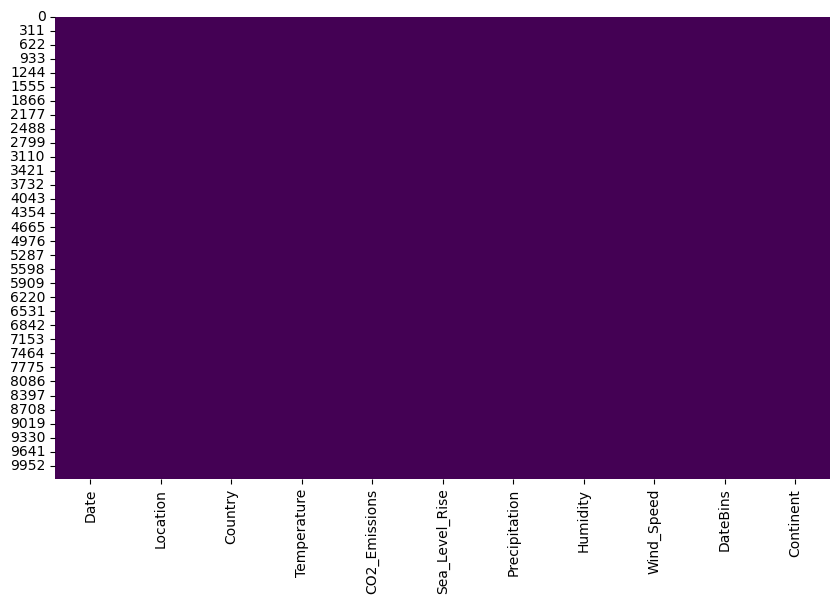

In [181]:
# Create a heatmap of missing data to show its distribution
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.show()
#we can see the missing data is clustered in one place
#once I updated how I did bins, all the dates that accidentally fell outside the bin parameters were captured!

In [182]:
missing_percentage = (merged_df.isna().mean() * 100).round(2)
print(missing_percentage)
#4.38% - this is a very small percentage
#after adjusting my code, it is now 0%!

Date              0.0
Location          0.0
Country           0.0
Temperature       0.0
CO2_Emissions     0.0
Sea_Level_Rise    0.0
Precipitation     0.0
Humidity          0.0
Wind_Speed        0.0
DateBins          0.0
Continent         0.0
dtype: float64


In [183]:
# Create a boolean mask for rows with missing values in the 'DateBins' column
missing_data_rows = merged_df[merged_df['DateBins'].isna()]

# Print the rows with missing data
print(missing_data_rows)


Empty DataFrame
Columns: [Date, Location, Country, Temperature, CO2_Emissions, Sea_Level_Rise, Precipitation, Humidity, Wind_Speed, DateBins, Continent]
Index: []


In [184]:
#oringally, I had 477 rows that had NaN in the DateBins column. 
#I realised that I had accidentally not captured all the dates when sorting them into DateBins originally
#so I checked the first date and last date, and made sure that the new code was able to grab and sort all the dates!


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [185]:
merged_df.describe()
#because this is over 20 years of data, it's hard to see if there's any outliers, or that the outliers are an error

Temperature  CO2_Emissions  Sea_Level_Rise  Precipitation  \
count  10237.000000   10237.000000    10237.000000   10237.000000   
mean      14.941298     400.199099       -0.002328      49.894602   
std        5.026639      49.708975        0.990980      28.872092   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.583778     367.129854       -0.671601      24.496064   
50%       14.976462     400.838390        0.003836      49.821026   
75%       18.305764     433.271511        0.678108      74.581874   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind_Speed  
count  10237.000000  10237.000000  
mean      49.787448     25.054818  
std       28.975428     14.453984  
min        0.018998      0.001732  
25%       24.635689     12.544312  
50%       49.694829     24.819398  
75%       75.306185     37.636347  
max       99.959665     49.997664

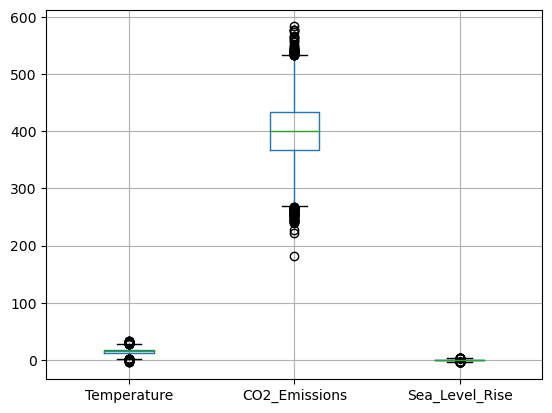

In [186]:
#box plots
merged_df.boxplot(column=['Temperature', 'CO2_Emissions', 'Sea_Level_Rise'])
plt.show()
#this shows that carbon dioxide emissions outside the min/max 1.5x quartile values are grouped in two places, but:
#1: that's sort of expected considering that the earth "breathes" and emissions have a normal rise and fall throughout the year;
#2: that's a lot of outliers, and at that point, I am not comfortable calling that many outliers
#3: they're a pretty symmetrical spread! that also indicates to me that maybe the Co2 emissions are just .....that wide a spread
#however, there is one point that's way way outside the "outlier clumps"
#I don't want to mess with this data point, so I am leaving it as is for now...
#HOWEVER, not only is this all 22 years of data, it's ALSO three different kinds of measurements smooshed together

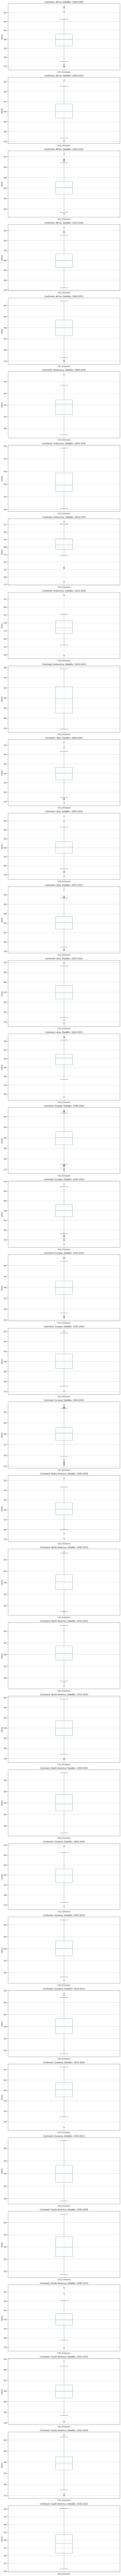

In [187]:
#this time, breaking up the box plot by column, date bins, and continents
#Carbon dioxide emissions go first

# Group the data by 'Continent' and 'DateBins'
grouped = merged_df.groupby(['Continent', 'DateBins'])

# Create subplots for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(10, 6 * len(grouped)))

# Iterate through the groups and create box plots for each
for (group, data), ax in zip(grouped, axes):
    data.boxplot(column=['CO2_Emissions'], ax=ax)
    ax.set_title(f'Continent: {group[0]}, DateBin: {group[1]}')
    ax.set_ylabel('Values')  # You can set the y-axis label if needed

plt.tight_layout()
plt.show()

#results: you see a lot more of the individual outliers this way, and some of them are REALLY far out


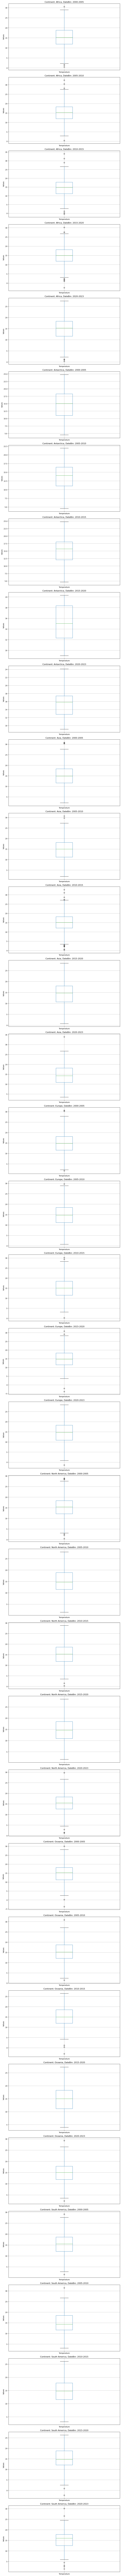

In [188]:
#breaking up the box plot by column, date bins, and continents
#temperatures goes second

# Group the data by 'Continent' and 'DateBins'
grouped = merged_df.groupby(['Continent', 'DateBins'])

# Create subplots for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(10, 6 * len(grouped)))

# Iterate through the groups and create box plots for each
for (group, data), ax in zip(grouped, axes):
    data.boxplot(column=['Temperature'], ax=ax)
    ax.set_title(f'Continent: {group[0]}, DateBin: {group[1]}')
    ax.set_ylabel('Values')  # You can set the y-axis label if needed

plt.tight_layout()
plt.show()

#there are outliers here too!


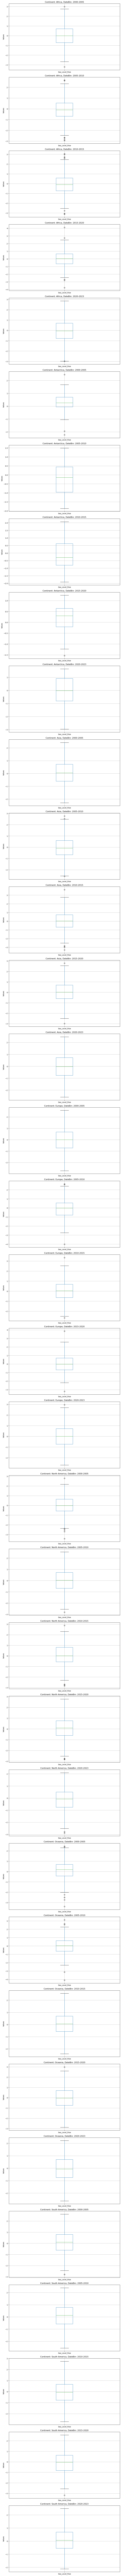

In [189]:
#breaking up the box plot by column, date bins, and continents
#sea level change goes third

# Group the data by 'Continent' and 'DateBins'
grouped = merged_df.groupby(['Continent', 'DateBins'])

# Create subplots for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(10, 6 * len(grouped)))

# Iterate through the groups and create box plots for each
for (group, data), ax in zip(grouped, axes):
    data.boxplot(column=['Sea_Level_Rise'], ax=ax)
    ax.set_title(f'Continent: {group[0]}, DateBin: {group[1]}')
    ax.set_ylabel('Values')  # You can set the y-axis label if needed

plt.tight_layout()
plt.show()

#results: there are outliers here as well!

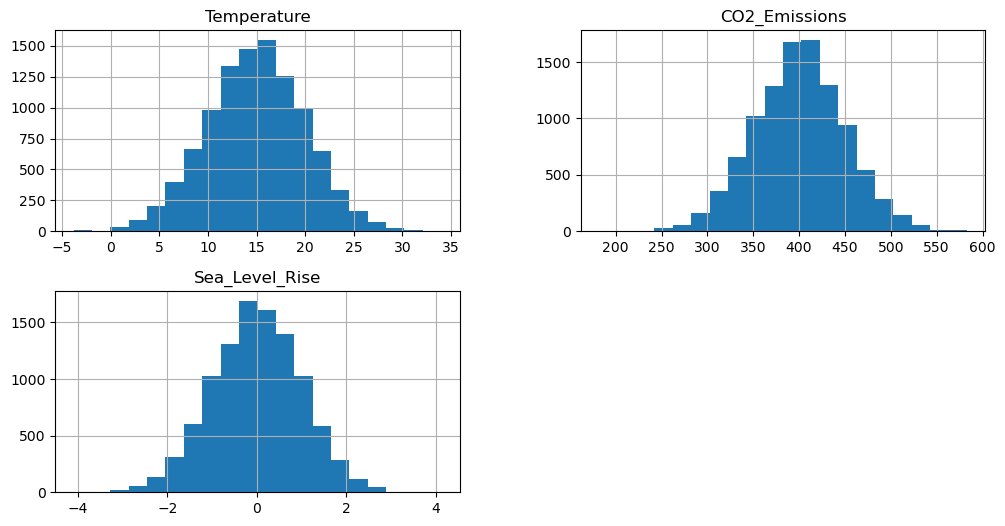

In [190]:
#histograms
merged_df[['Temperature', 'CO2_Emissions', 'Sea_Level_Rise']].hist(bins=20, figsize=(12, 6))
plt.show()
#these look like pretty normal bell curves
#however, this is 22 years of global data all smushed together, so lets break it up

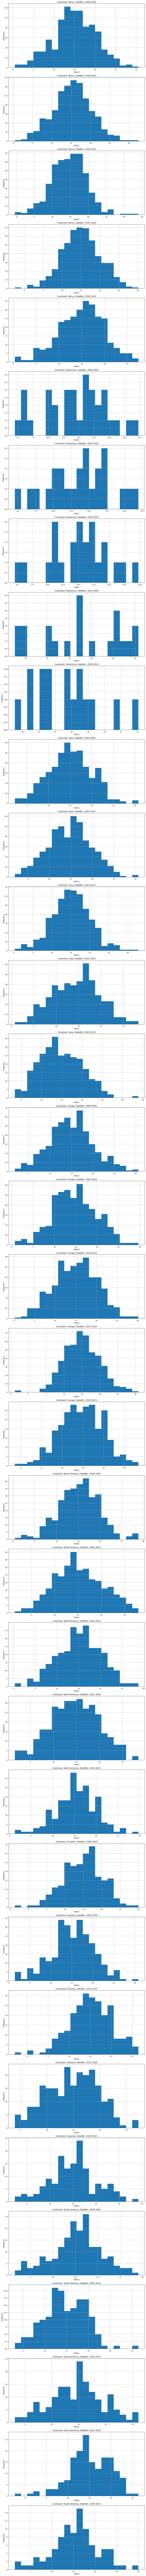

In [191]:
#Temperature goes first
# Group the data by 'Continent' and 'DateBins'
grouped = merged_df.groupby(['Continent', 'DateBins'])

# Create subplots for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(12, 6 * len(grouped)))

# Iterate through and create histograms for each
for (group, data), ax in zip(grouped, axes):
    data[['Temperature']].hist(bins=20, ax=ax)
    ax.set_title(f'Continent: {group[0]}, DateBin: {group[1]}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#you can see something super funky is going on in Antarctica
#it's not that the other continents don't have outliers, but they all have much more "normal" looking charts than Antarctica!



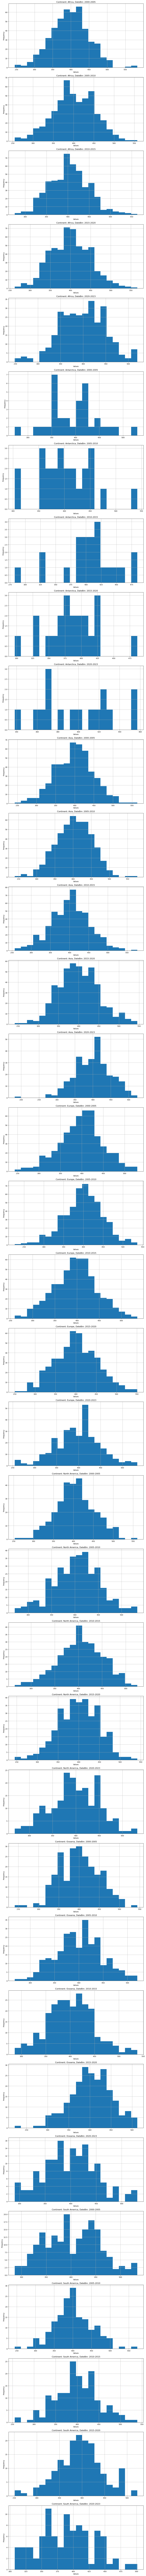

In [192]:
#carbon dioxide emissions go second
# Group the data by 'Continent' and 'DateBins'
grouped = merged_df.groupby(['Continent', 'DateBins'])

# Create subplots for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(12, 6 * len(grouped)))

# Iterate through and create histograms for each
for (group, data), ax in zip(grouped, axes):
    data[['CO2_Emissions']].hist(bins=20, ax=ax)
    ax.set_title(f'Continent: {group[0]}, DateBin: {group[1]}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#Antarctica again is being super funky!
#Asia, Europe, and North America have a very tight cluster of emissions around the middle and skewed a bit left
#these are the big polluter nations
#South America however has a much wider sort of spread, and that remains true across the datebins, which indicates that
#while they also pollute their share, they have a wider range of lower level pollution in addition to the big carbon emitters
#it might correllate to reduced industrialization and consumption in comparison to the GLobal West and North

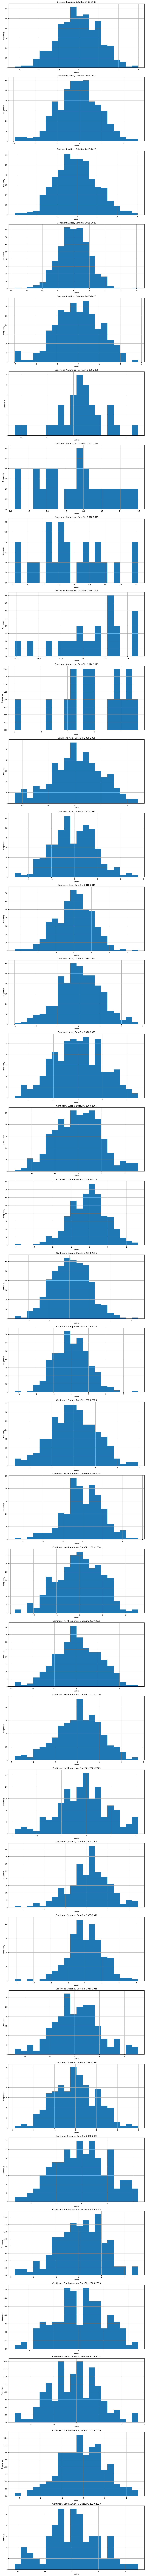

In [151]:
#sea level changes go third
# Group the data by 'Continent' and 'DateBins'
grouped = merged_df.groupby(['Continent', 'DateBins'])

# Create subplots for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(12, 6 * len(grouped)))

# Iterate through and create histograms for each
for (group, data), ax in zip(grouped, axes):
    data[['Sea_Level_Rise']].hist(bins=20, ax=ax)
    ax.set_title(f'Continent: {group[0]}, DateBin: {group[1]}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#Antarctica is funky, but the sea levels do seem to be rising around there
#the bell curve by Asia seems to tighten over time, which means less variation in sea level rise
#but also, the chart gradually shifts towards the right which indicates that the sea is rising, albeit slowly
#you see a similar shift with Oceania
#South America is all over the place

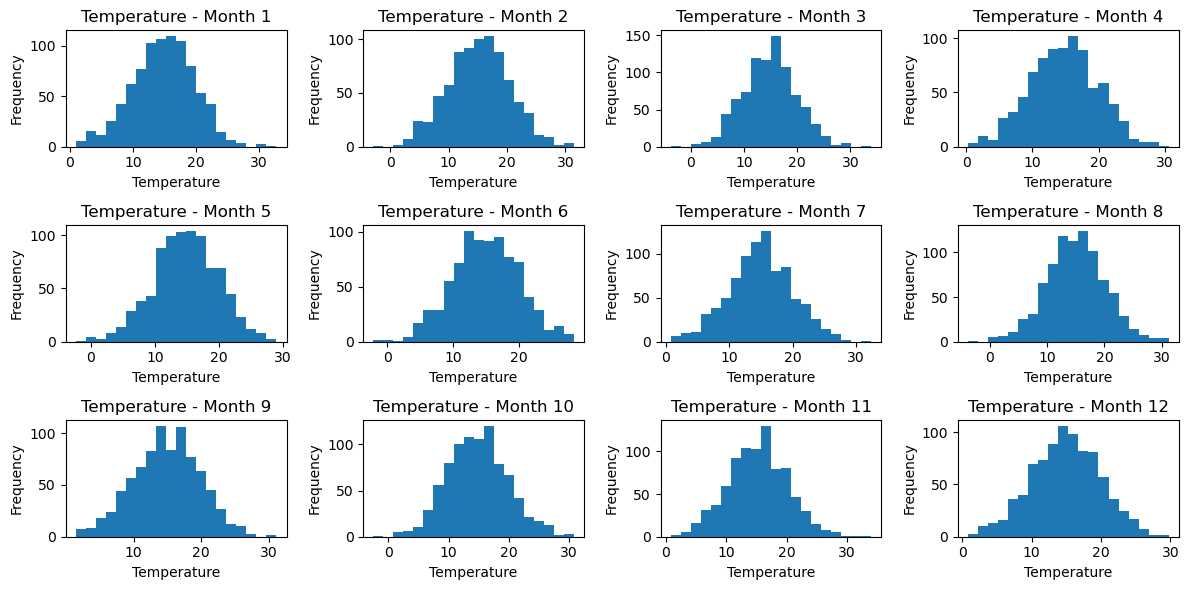

In [152]:
#breaking it all down by month this time

# Convert the 'Date' column to a datetime type if it's not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create a new column 'Month' to extract the month from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month

# Define the variables you want to plot
variables = ['Temperature']

# Create a separate histogram for each variable and each month
for variable in variables:
    plt.figure(figsize=(12, 6))
    for month in range(1, 13):  # Loop through each month (1 to 12)
        plt.subplot(3, 4, month)  # Create a subplot for each month
        plt.hist(merged_df[merged_df['Month'] == month][variable], bins=20)
        plt.title(f'{variable} - Month {month}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()


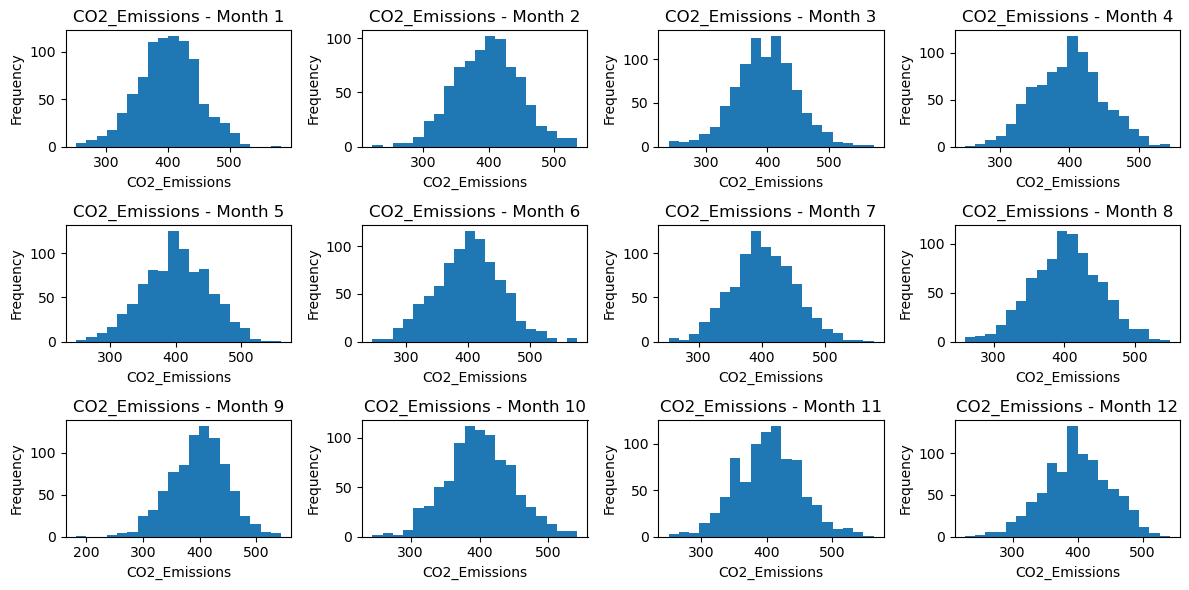

In [153]:
#doing it again for carbon dioxide

# Convert the 'Date' column to a datetime type if it's not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create a new column 'Month' to extract the month from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month

# Define the variables you want to plot
variables = ['CO2_Emissions']

# Create a separate histogram for each variable and each month
for variable in variables:
    plt.figure(figsize=(12, 6))
    for month in range(1, 13):  # Loop through each month (1 to 12)
        plt.subplot(3, 4, month)  # Create a subplot for each month
        plt.hist(merged_df[merged_df['Month'] == month][variable], bins=20)
        plt.title(f'{variable} - Month {month}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()


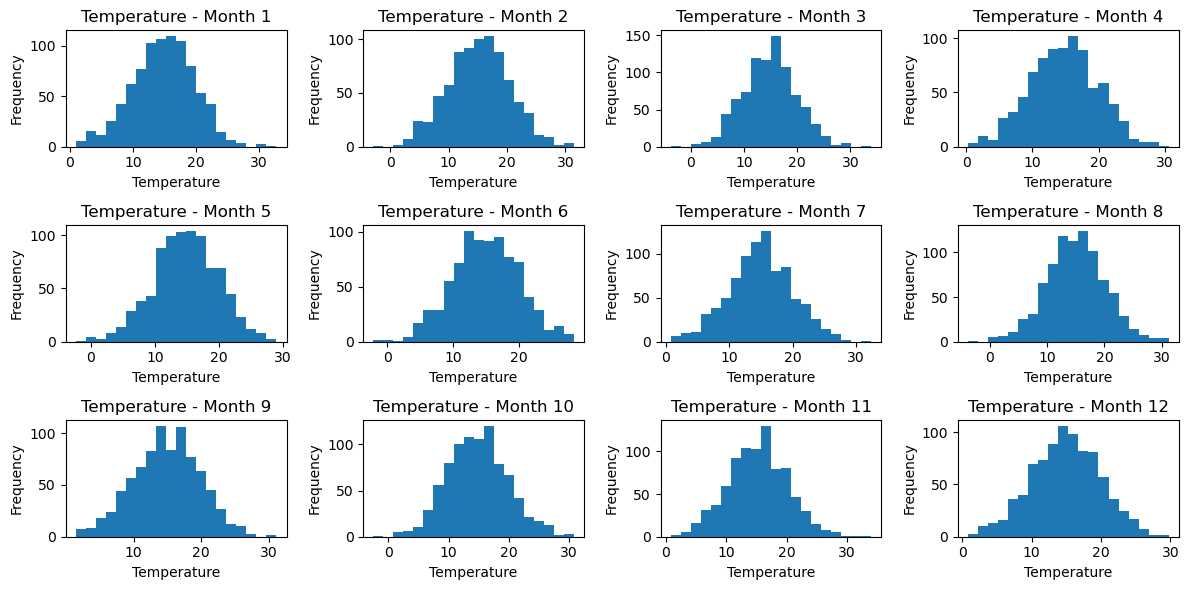

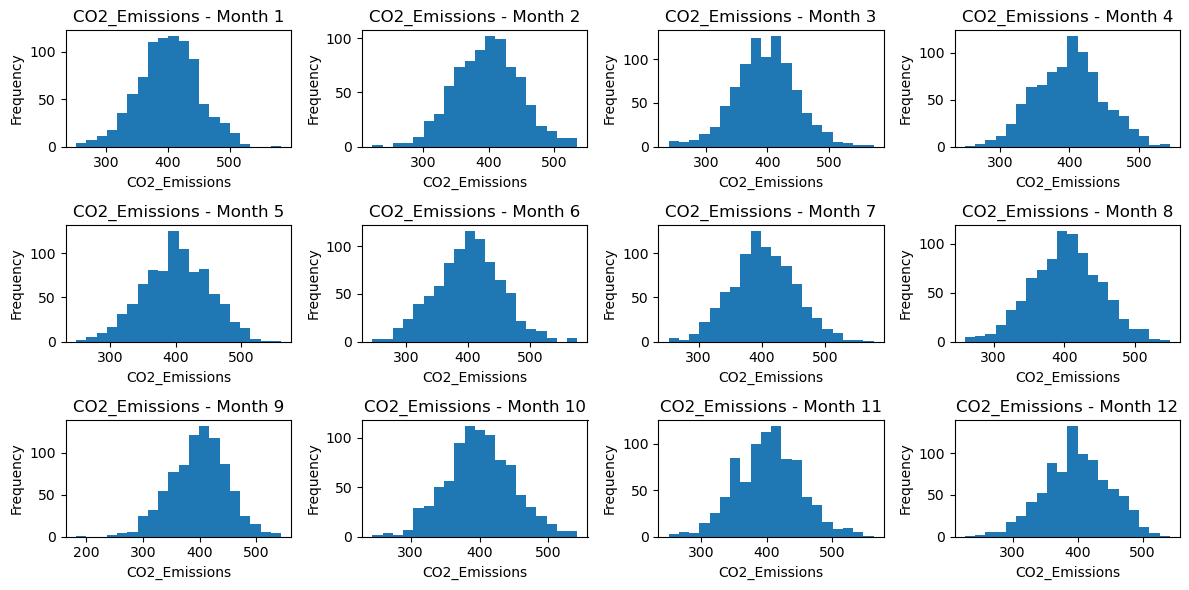

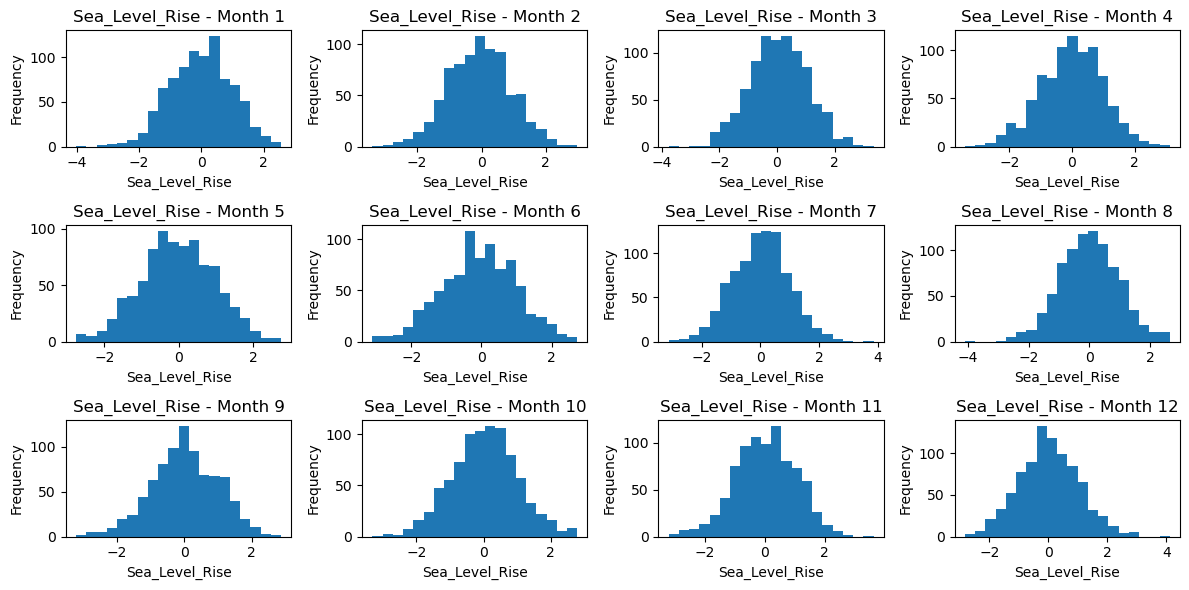

In [154]:
#and one more time, for sea level rise

# Convert the 'Date' column to a datetime type if it's not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create a new column 'Month' to extract the month from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month

# Define the variables you want to plot
variables = ['Temperature', 'CO2_Emissions', 'Sea_Level_Rise']

# Create a separate histogram for each variable and each month
for variable in variables:
    plt.figure(figsize=(12, 6))
    for month in range(1, 13):  # Loop through each month (1 to 12)
        plt.subplot(3, 4, month)  # Create a subplot for each month
        plt.hist(merged_df[merged_df['Month'] == month][variable], bins=20)
        plt.title(f'{variable} - Month {month}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()


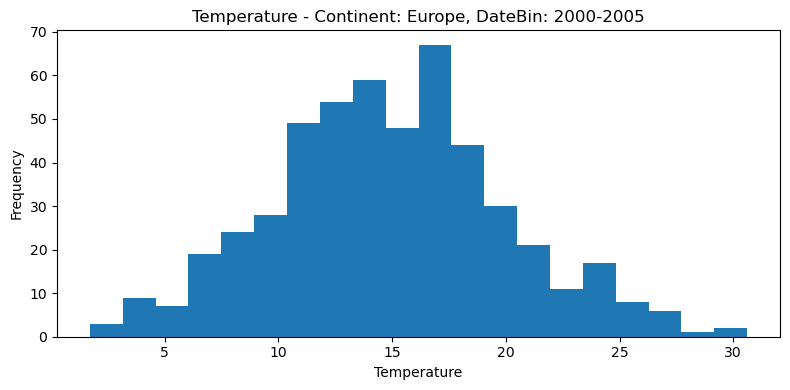

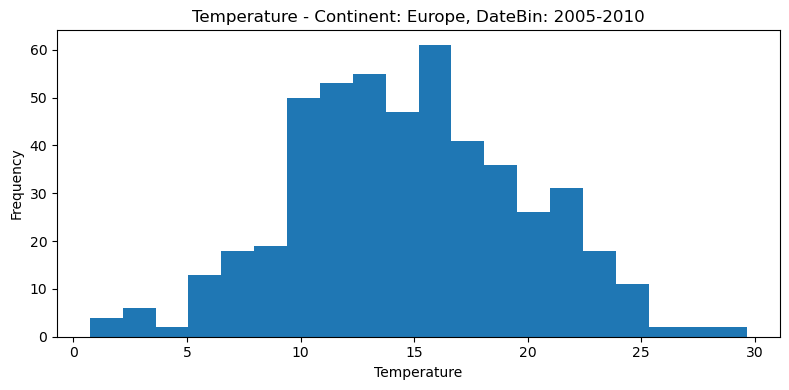

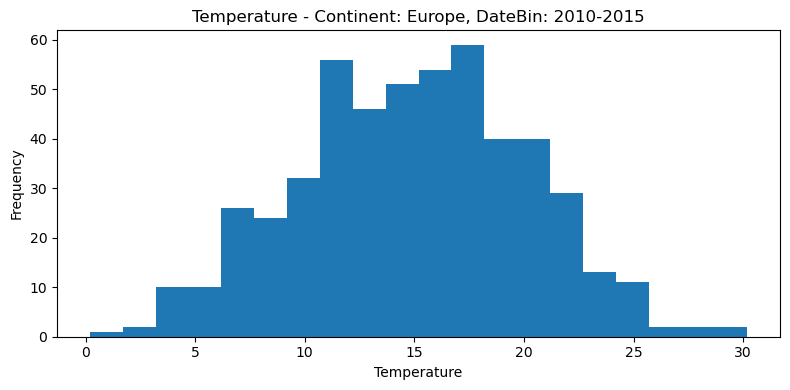

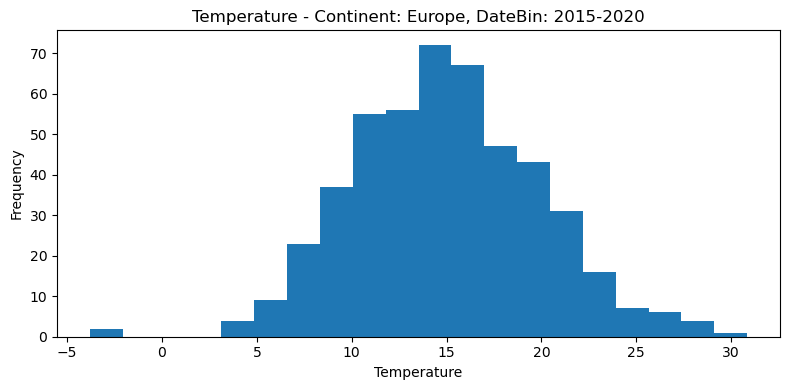

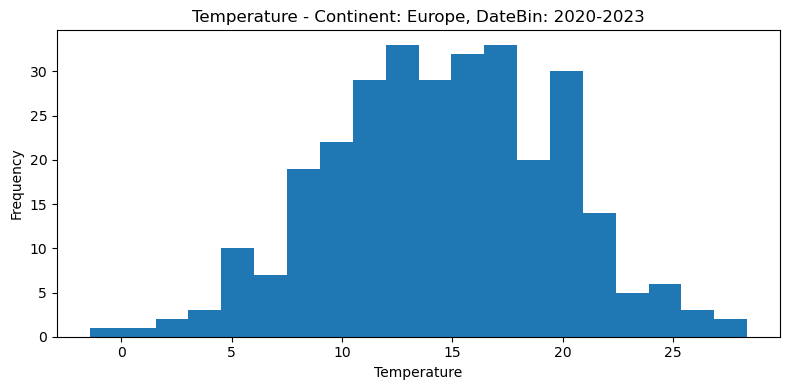

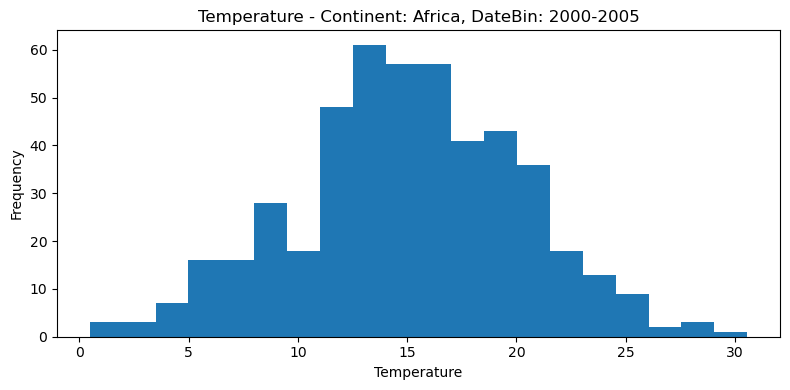

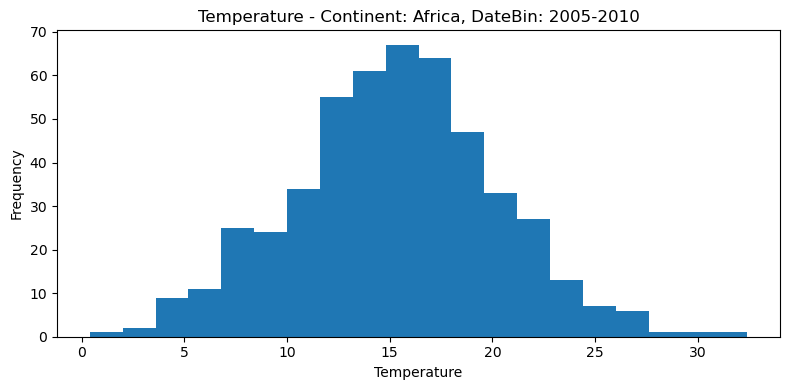

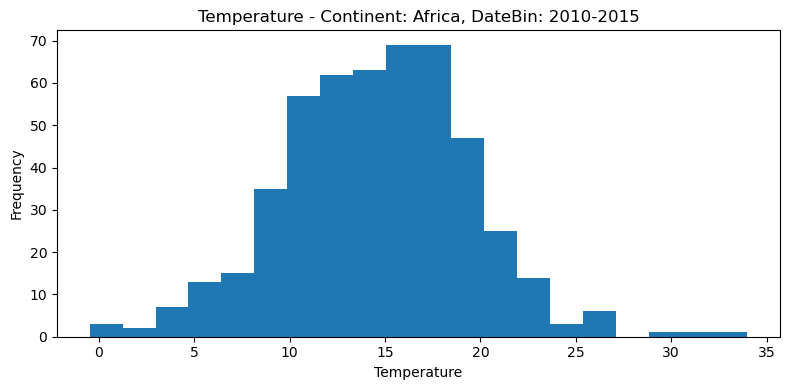

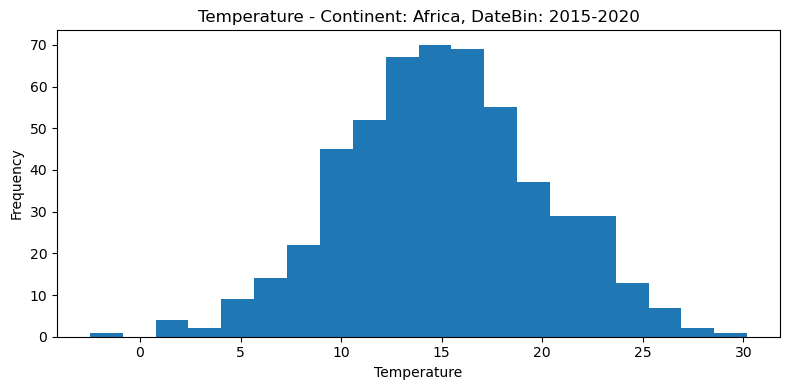

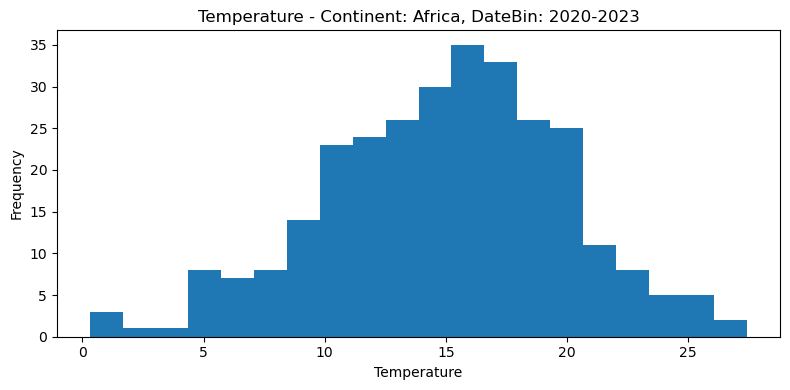

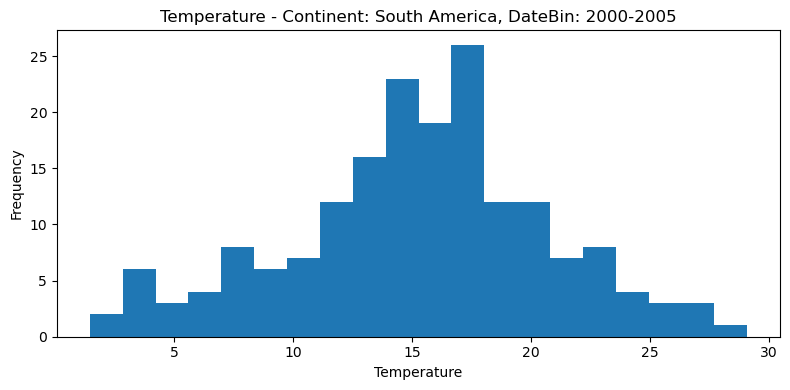

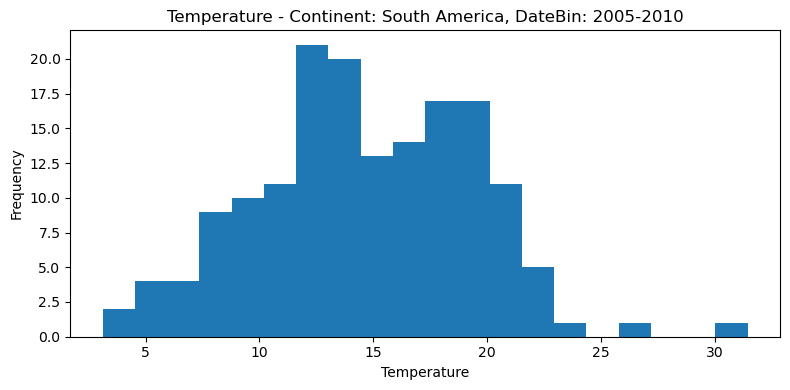

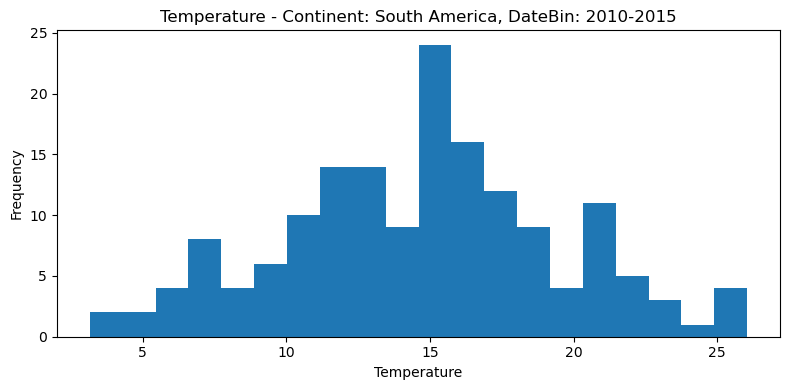

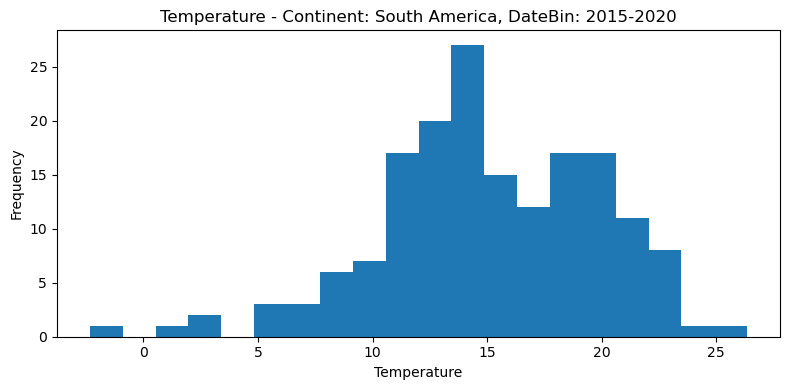

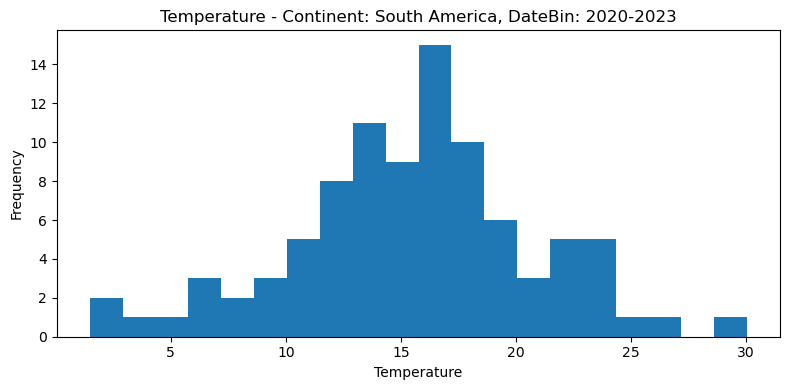

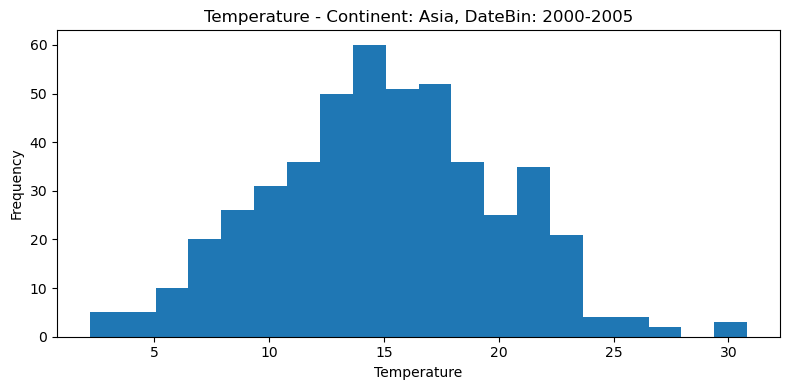

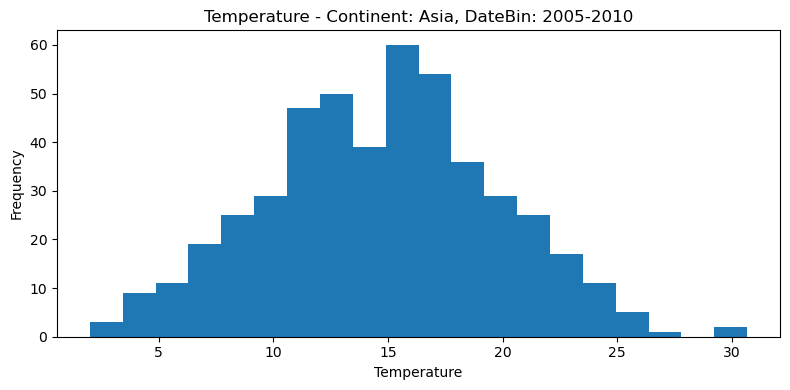

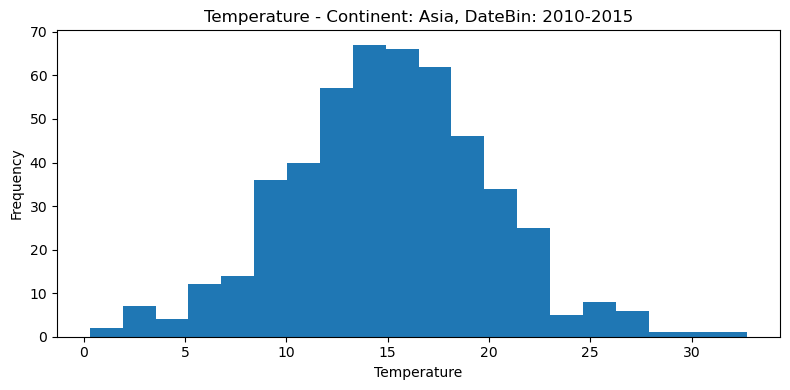

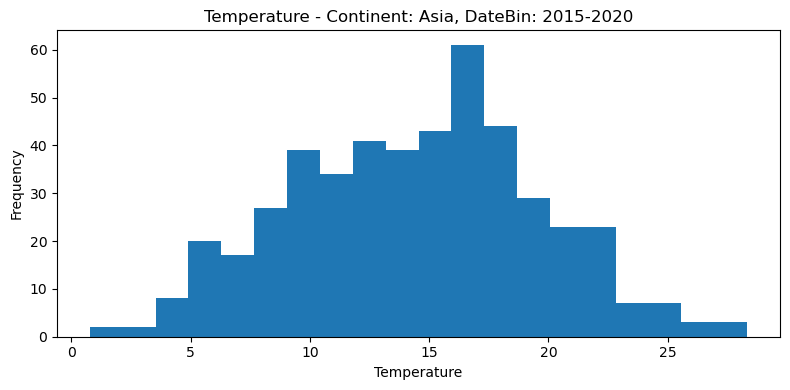

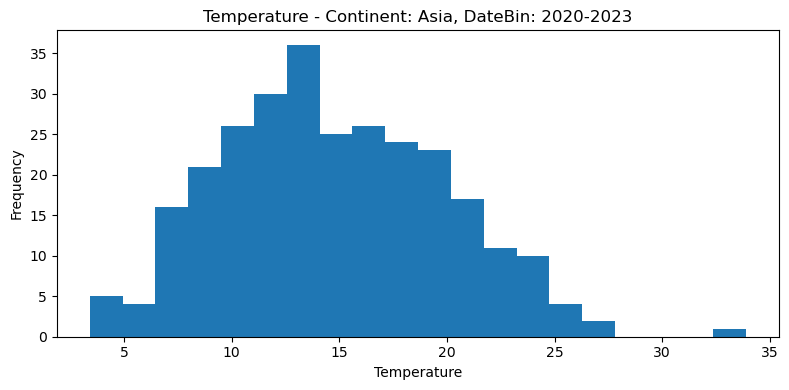

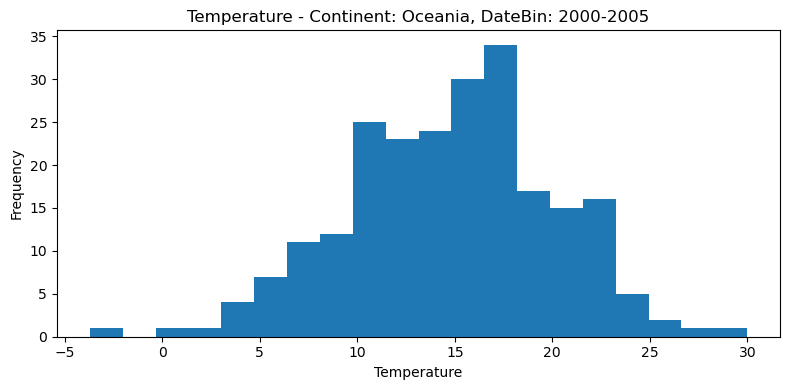

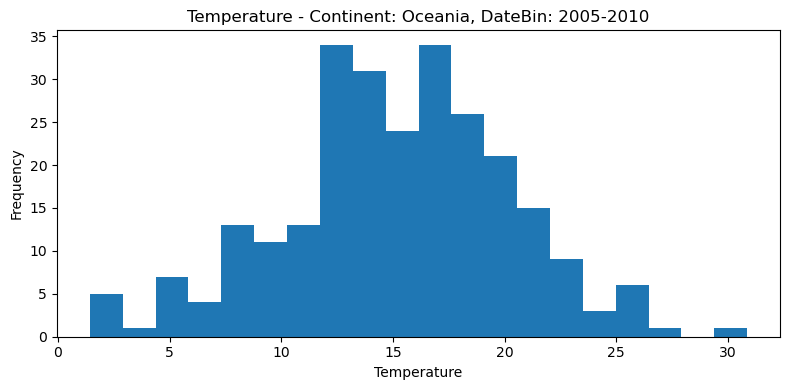

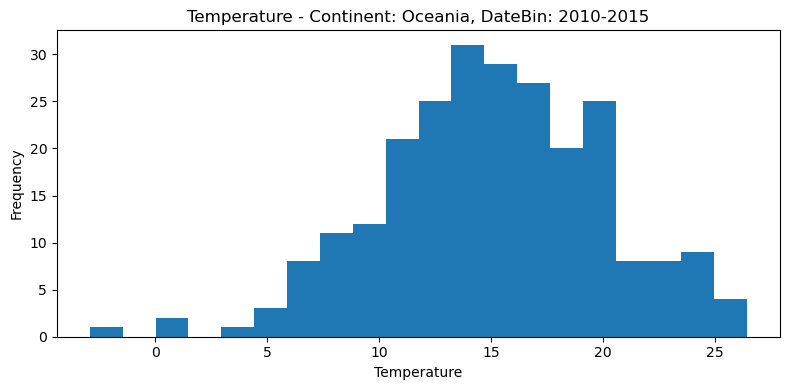

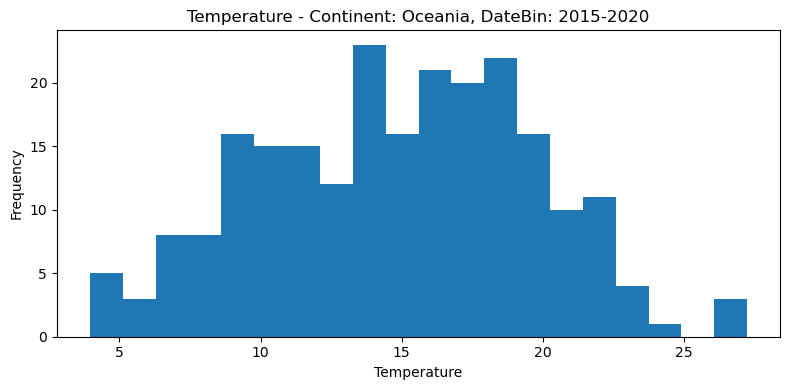

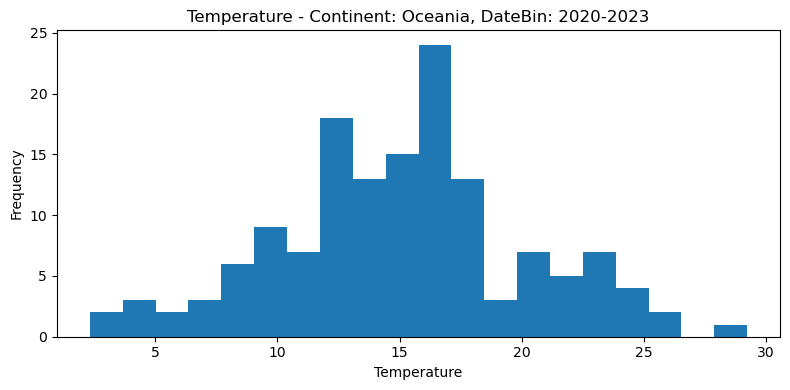

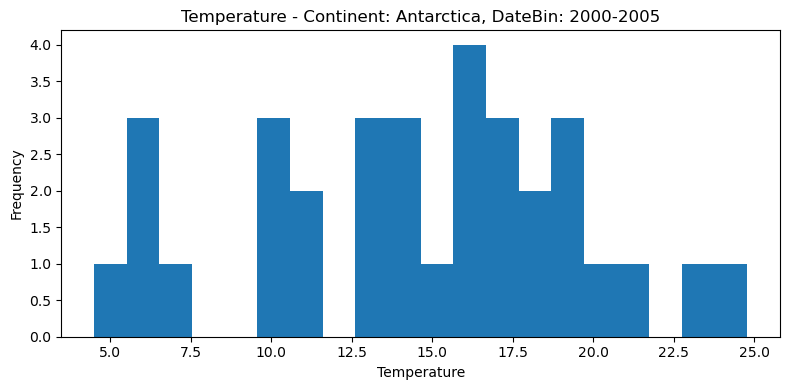

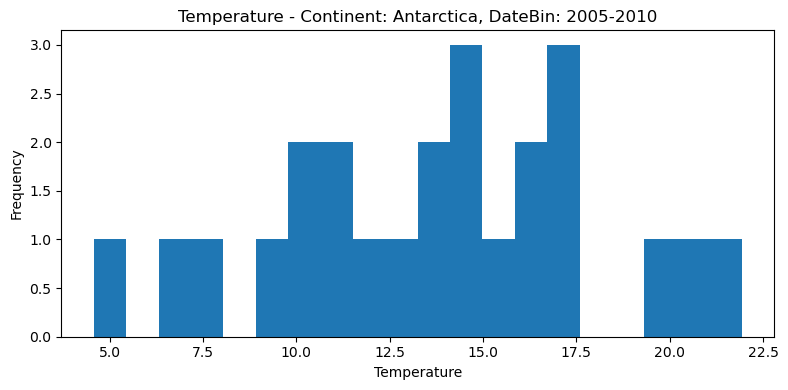

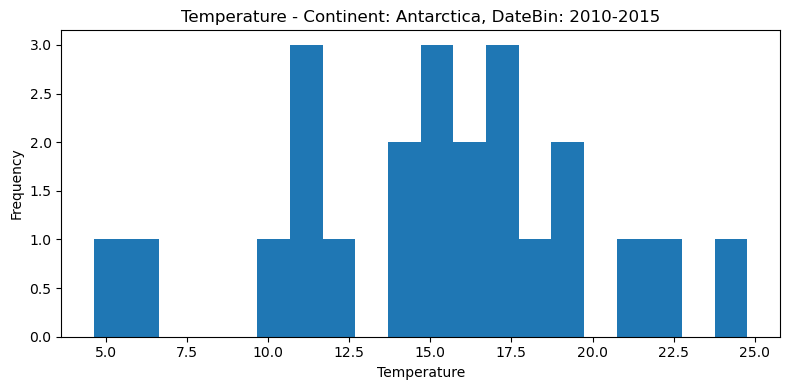

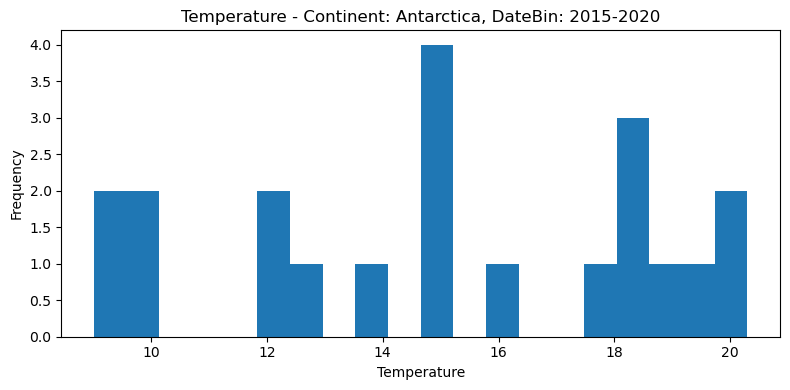

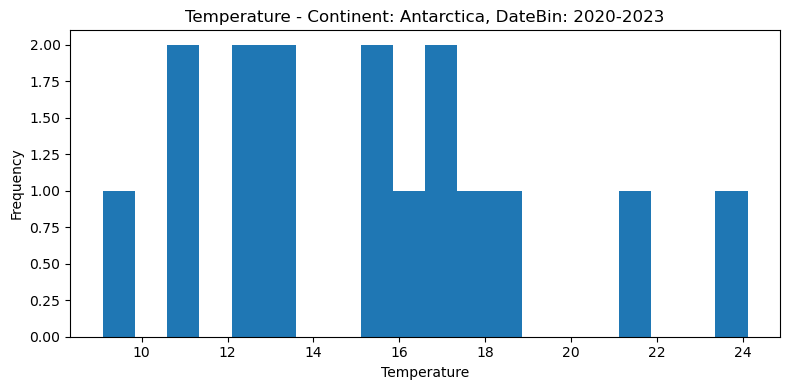

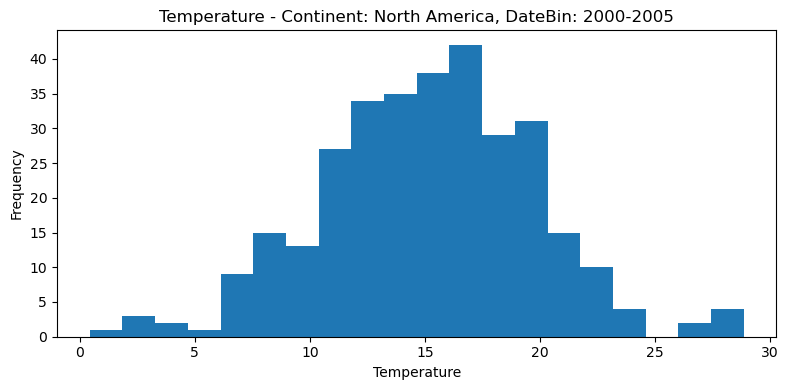

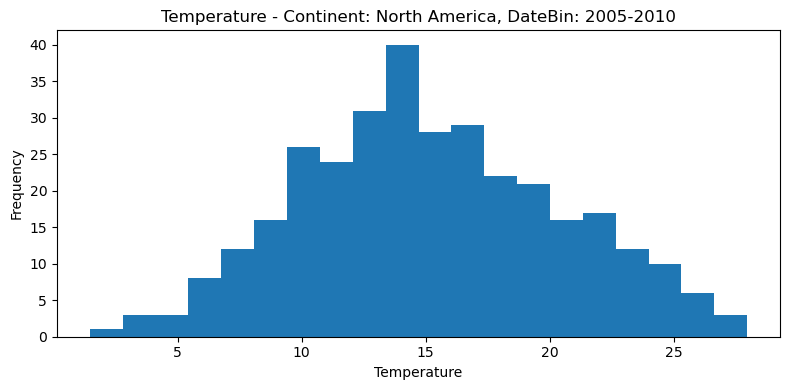

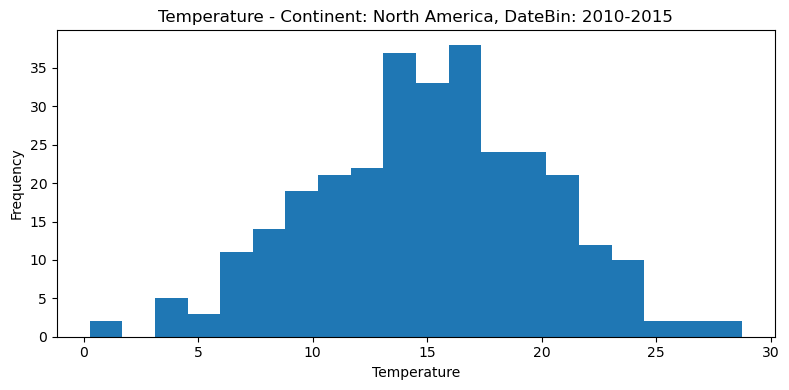

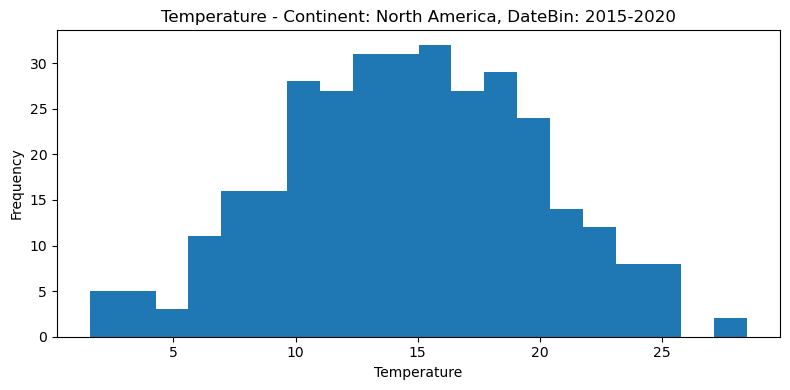

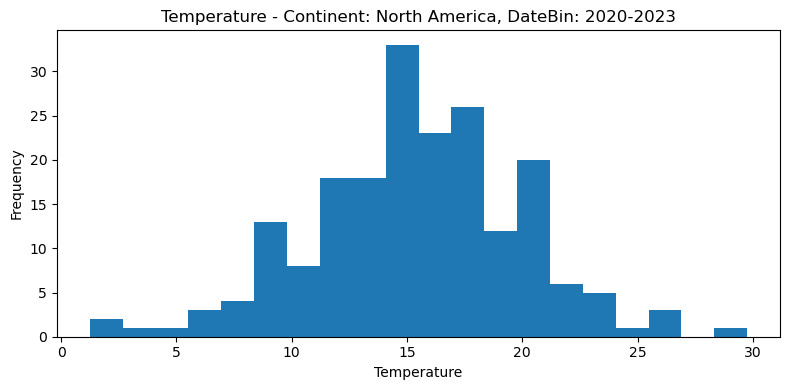

In [161]:
#let's break it down by continent, date bin, and month
#temperature first


# Convert the 'Date' column to a datetime type if it's not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create a new column 'Month' to extract the month from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month

# Define the variables you want to plot
variables = ['Temperature']

# Create subplots for each combination of Continent, DateBin, and Month
for variable in variables:
    for continent in merged_df['Continent'].unique():
        for datebin in merged_df['DateBins'].unique():
            plt.figure(figsize=(8, 4))
            plt.hist(merged_df[
                (merged_df['Continent'] == continent) &
                (merged_df['DateBins'] == datebin)
            ][variable], bins=20)
            plt.title(f'{variable} - Continent: {continent}, DateBin: {datebin}')
            plt.xlabel(variable)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
            
#Antarctica looks very weird!


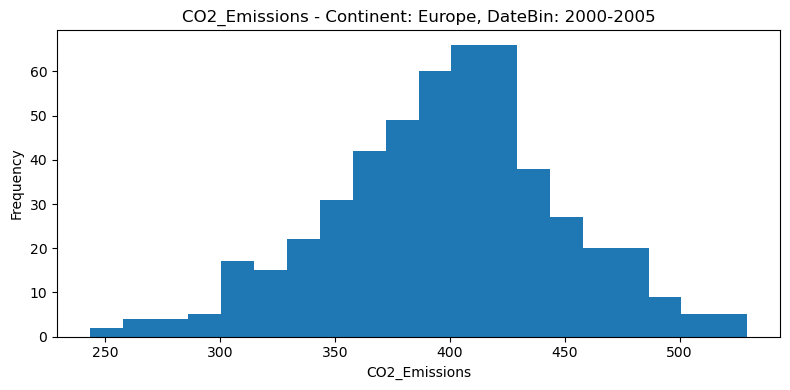

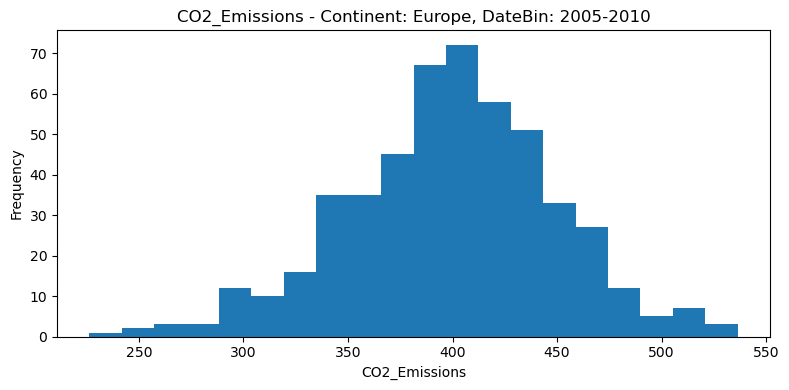

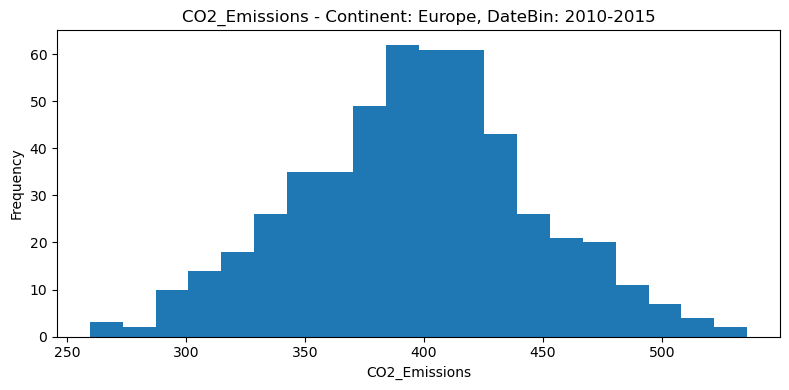

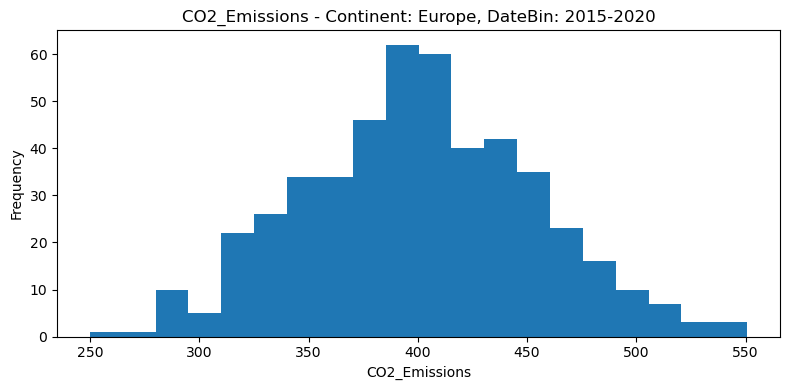

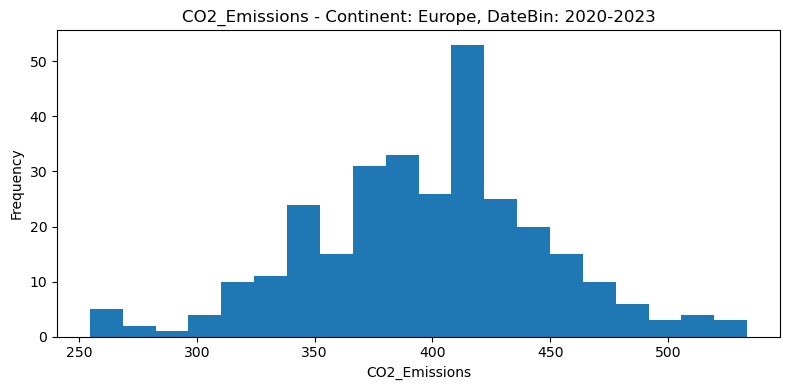

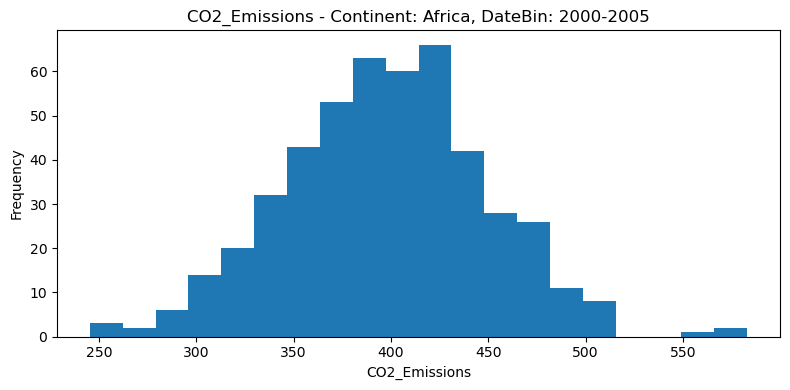

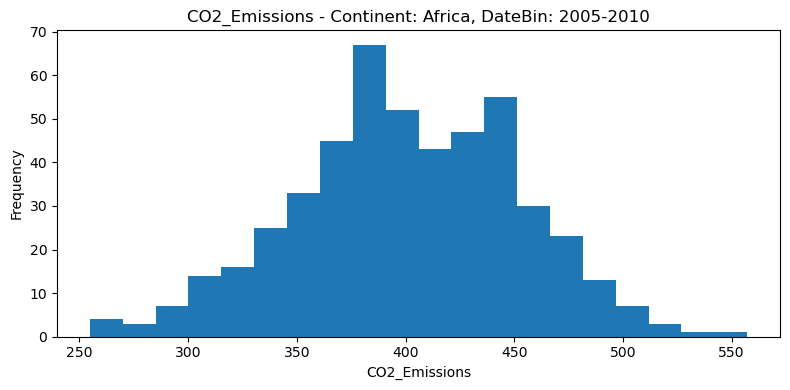

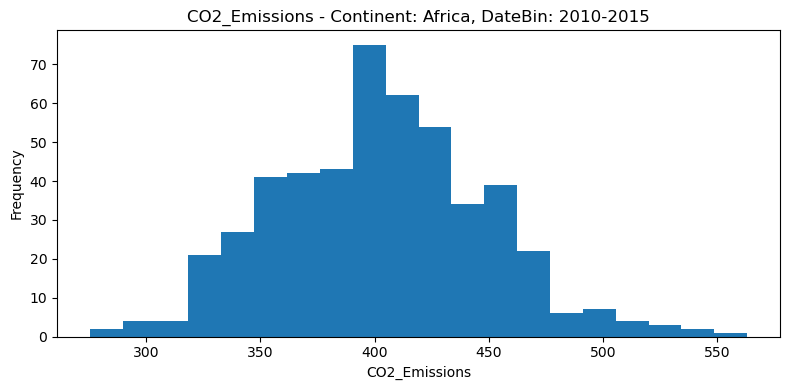

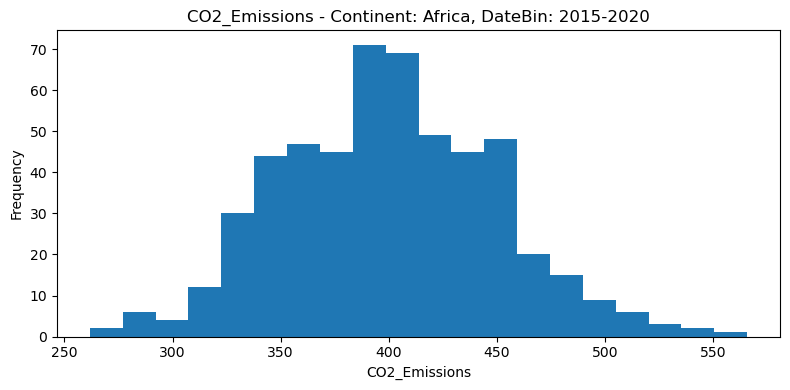

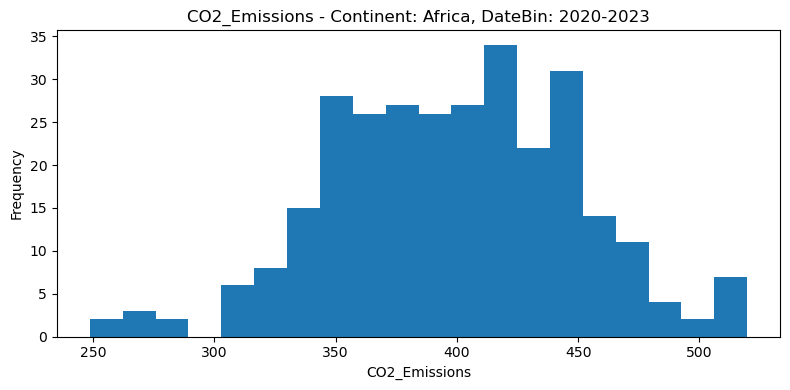

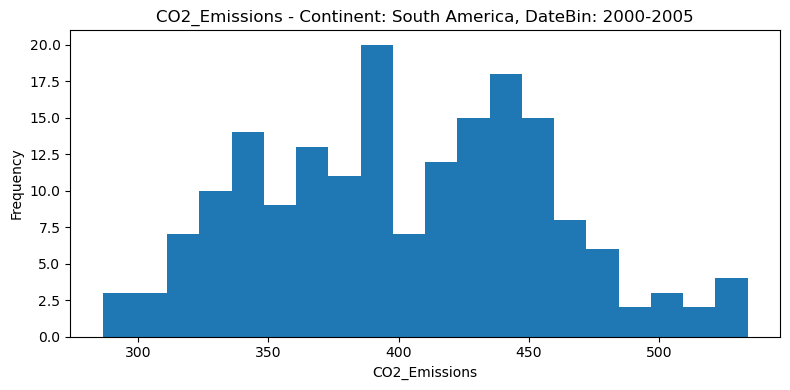

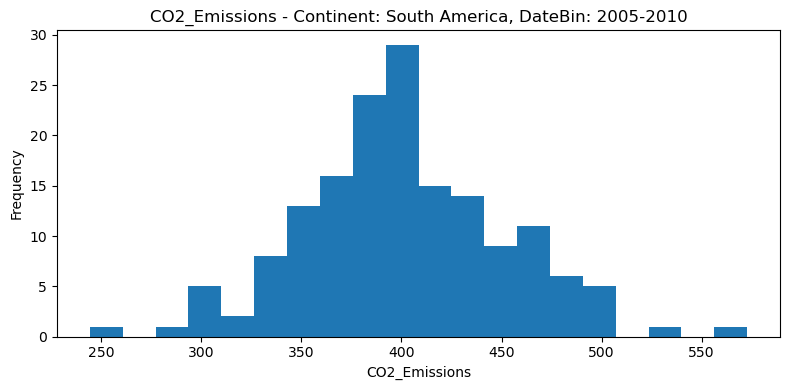

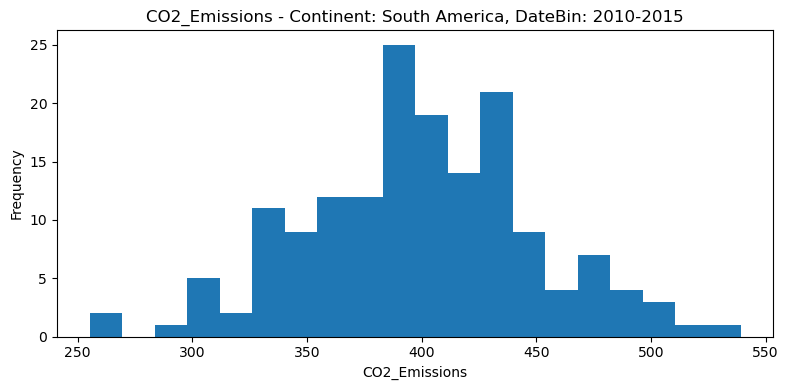

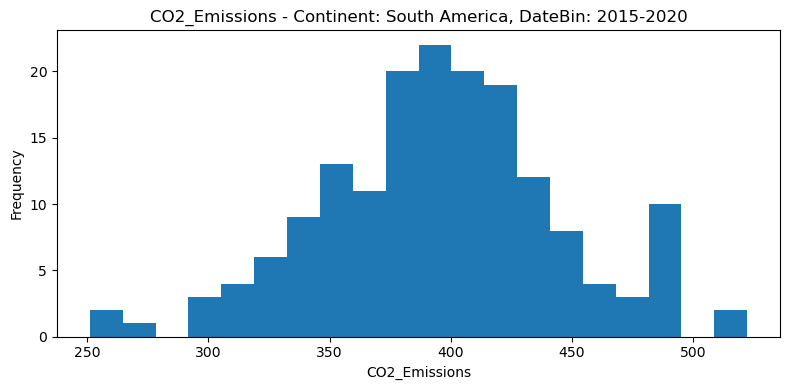

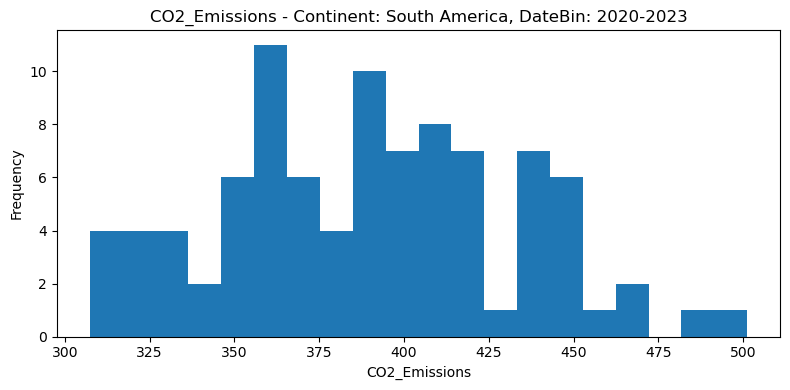

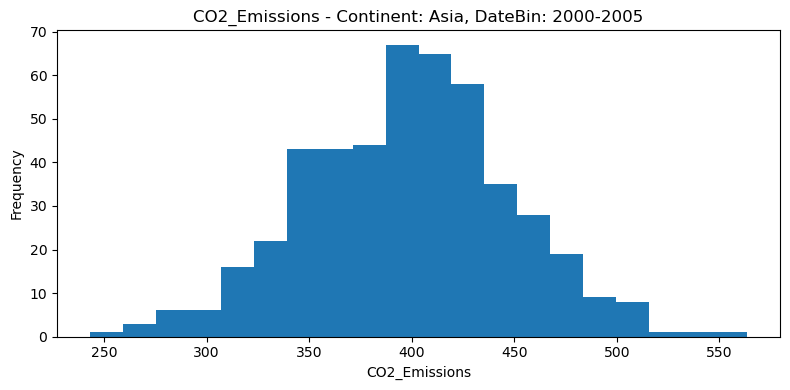

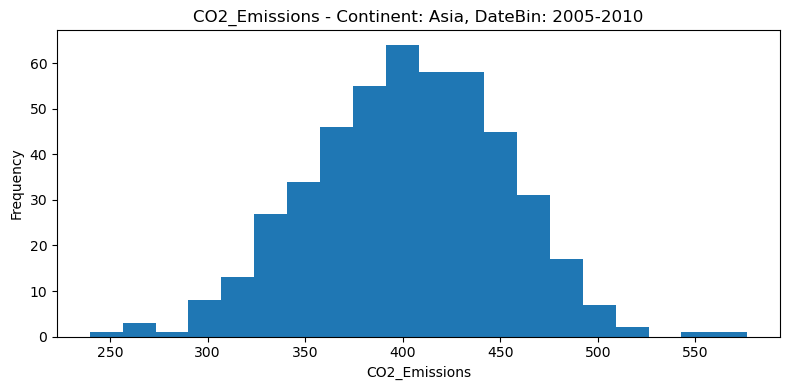

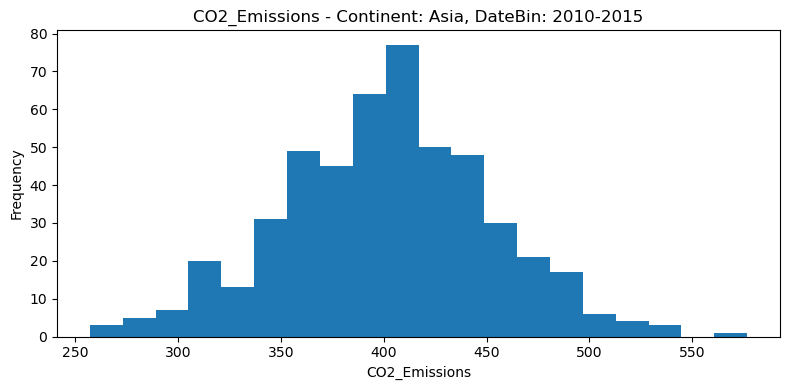

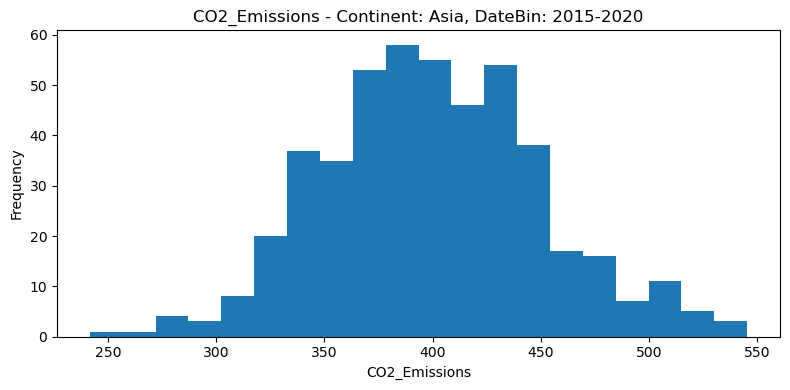

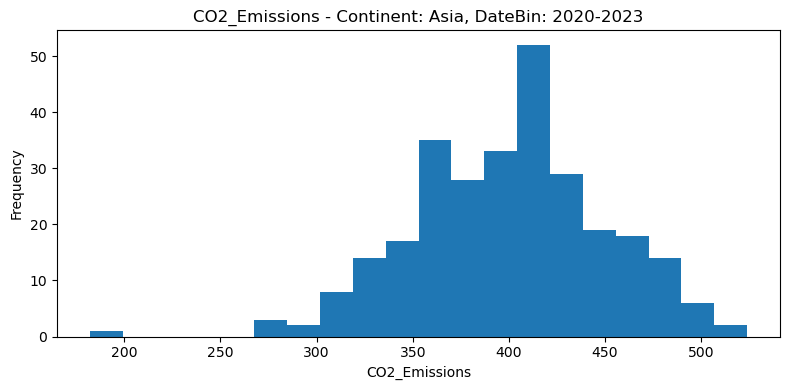

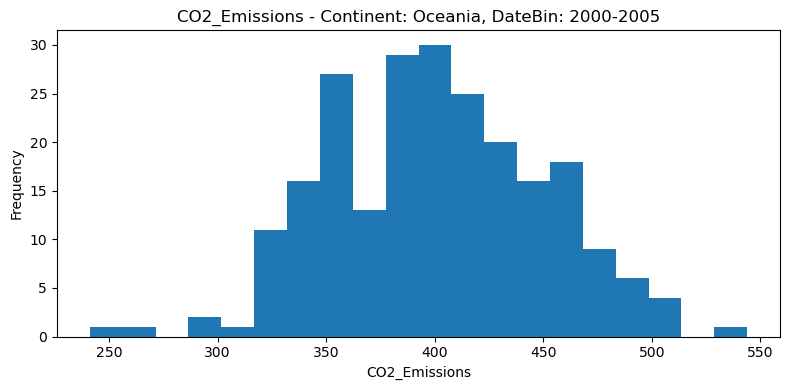

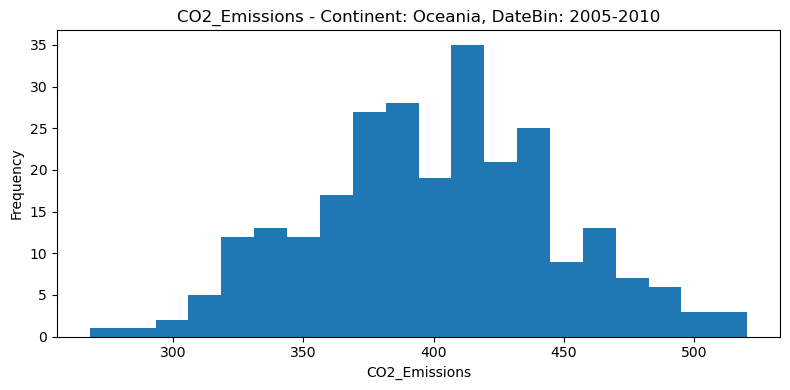

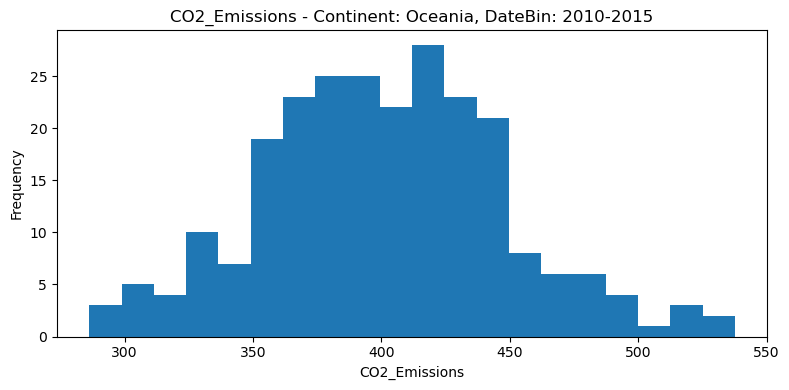

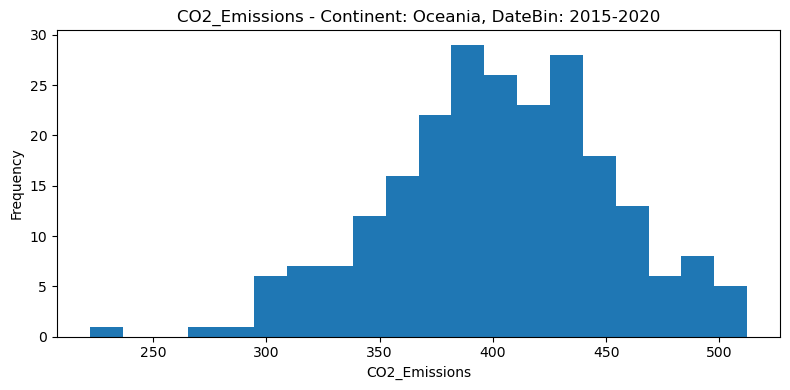

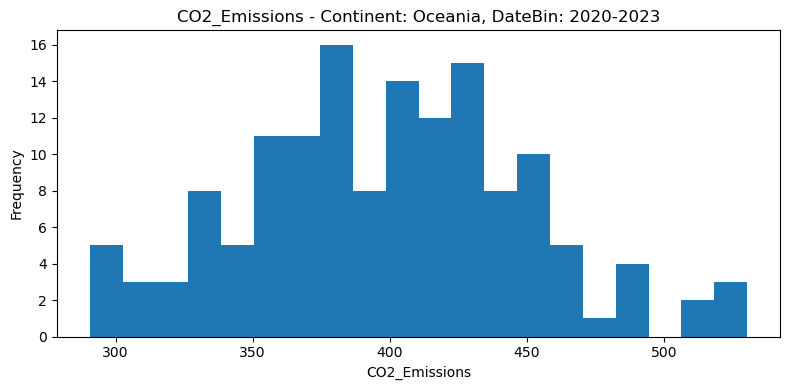

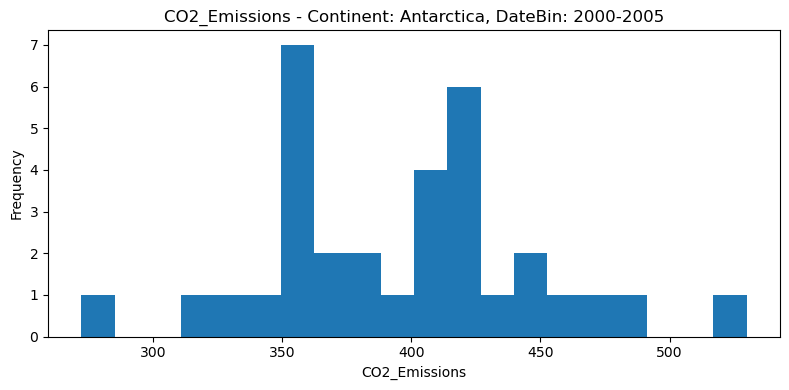

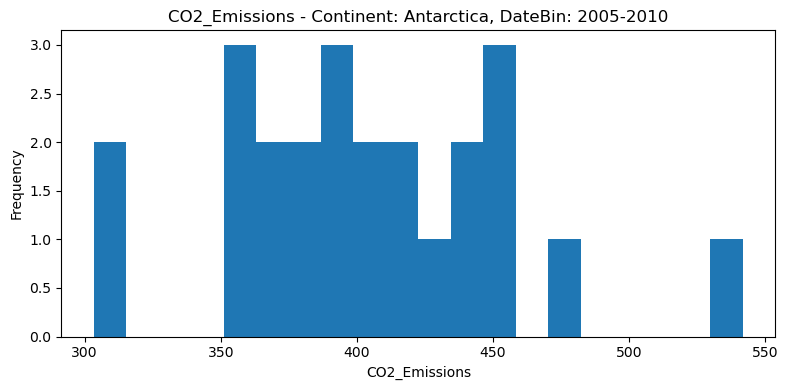

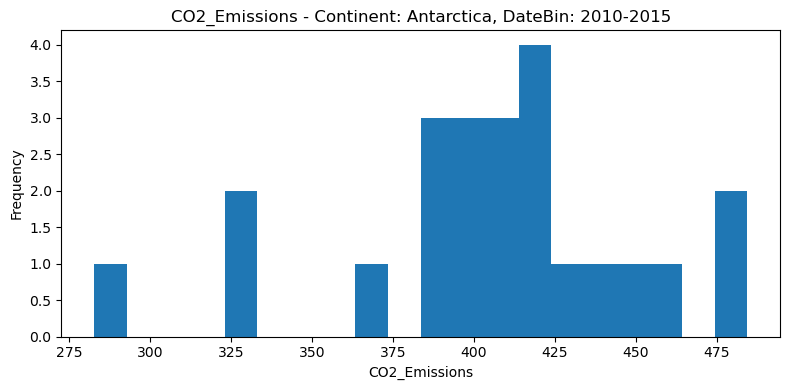

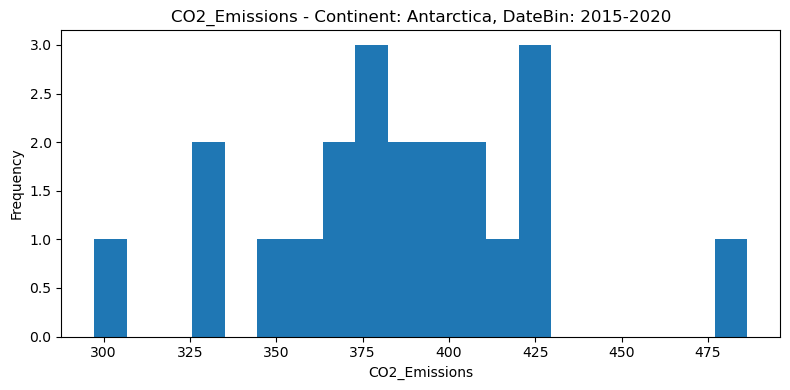

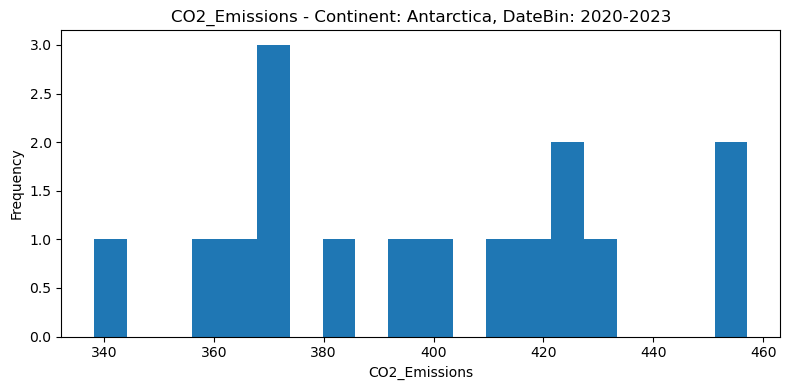

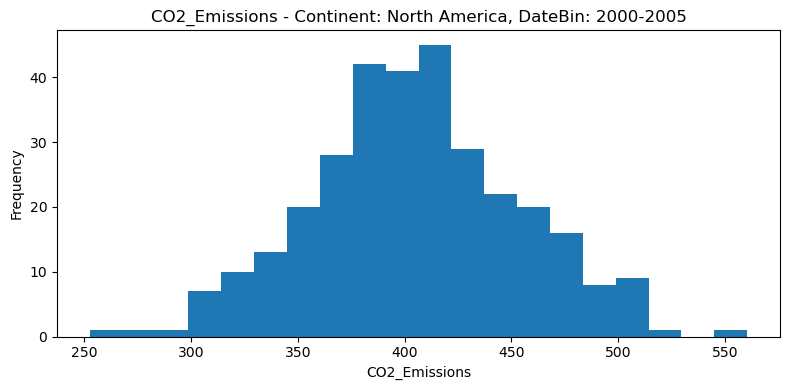

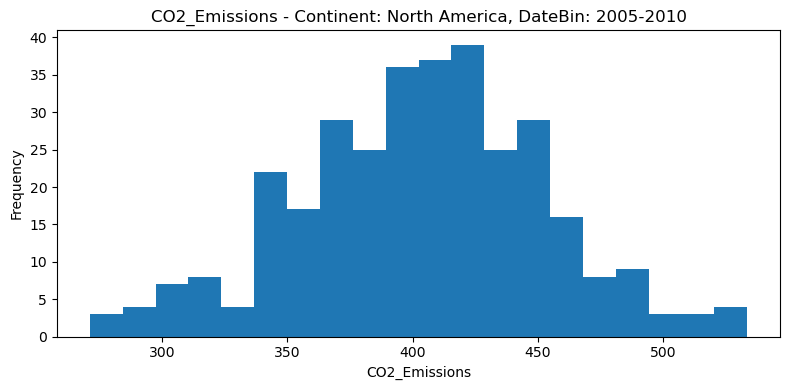

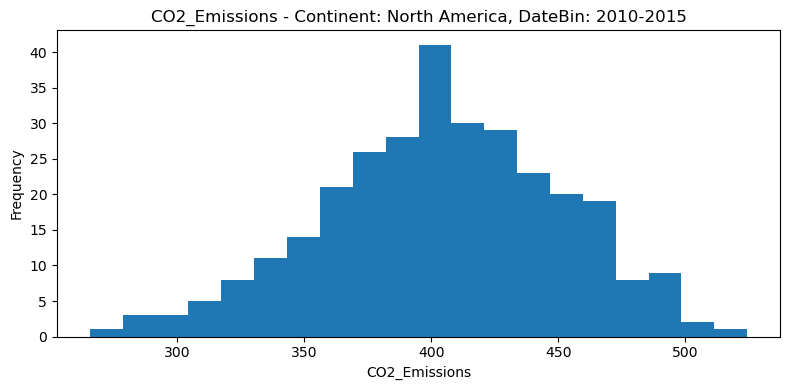

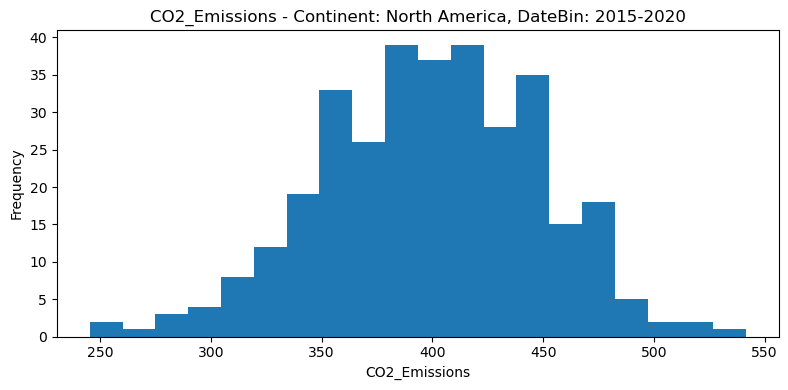

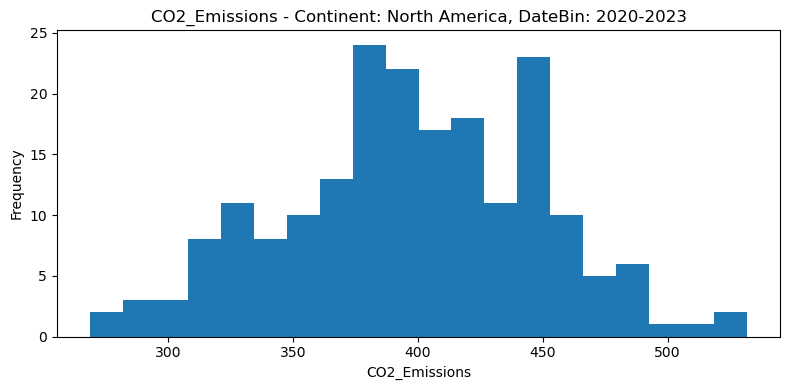

In [162]:
#now we do carbon emissions, by datebin, continent, and month

# Convert the 'Date' column to a datetime type if it's not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create a new column 'Month' to extract the month from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month

# Define the variables you want to plot
variables = ['CO2_Emissions']

# Create subplots for each combination of Continent, DateBin, and Month
for variable in variables:
    for continent in merged_df['Continent'].unique():
        for datebin in merged_df['DateBins'].unique():
            plt.figure(figsize=(8, 4))
            plt.hist(merged_df[
                (merged_df['Continent'] == continent) &
                (merged_df['DateBins'] == datebin)
            ][variable], bins=20)
            plt.title(f'{variable} - Continent: {continent}, DateBin: {datebin}')
            plt.xlabel(variable)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()

#Antarctica still looks super weird!


C:\Users\19739\AppData\Local\Temp\ipykernel_22656\3539836708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Month'] = merged_df['Date'].dt.month


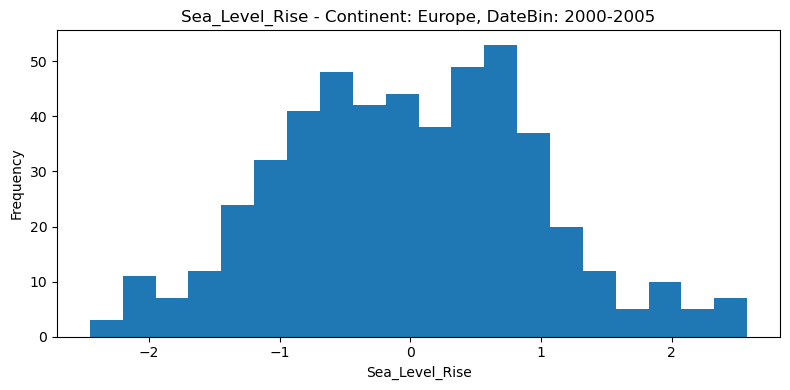

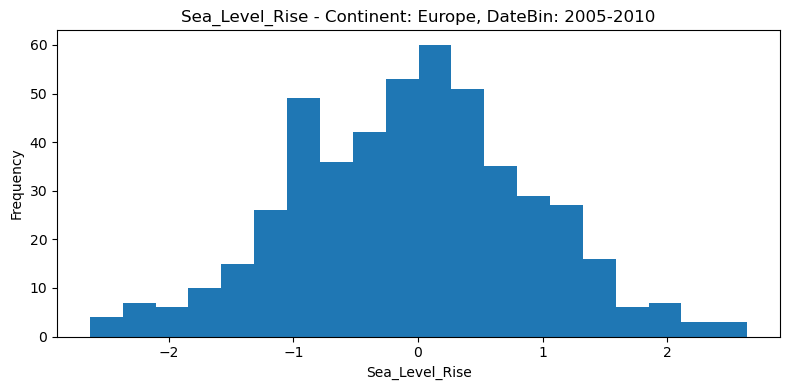

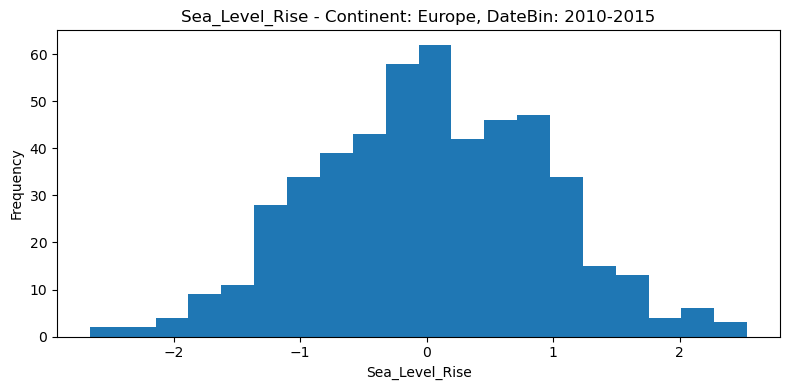

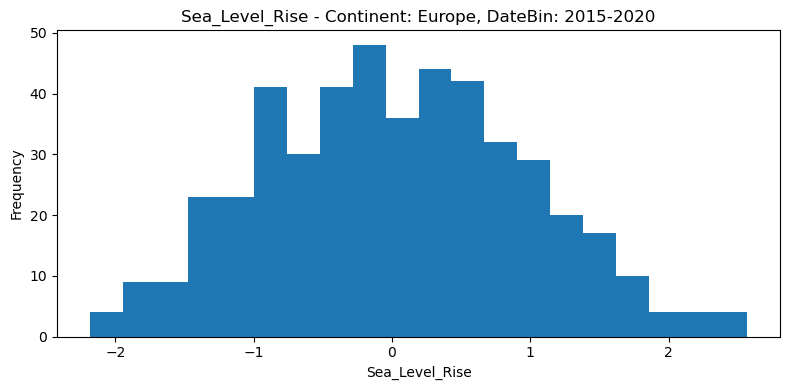

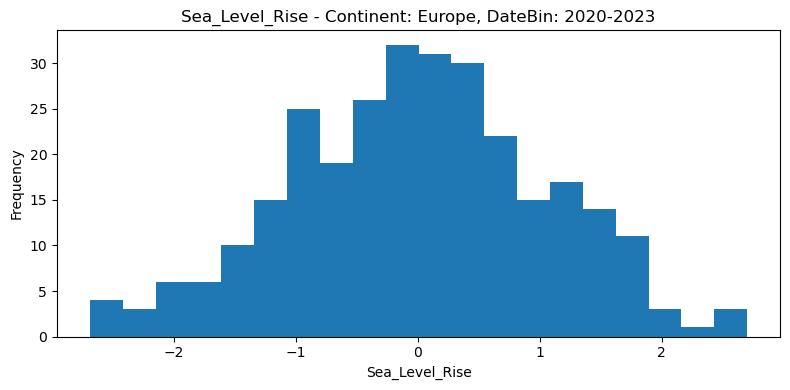

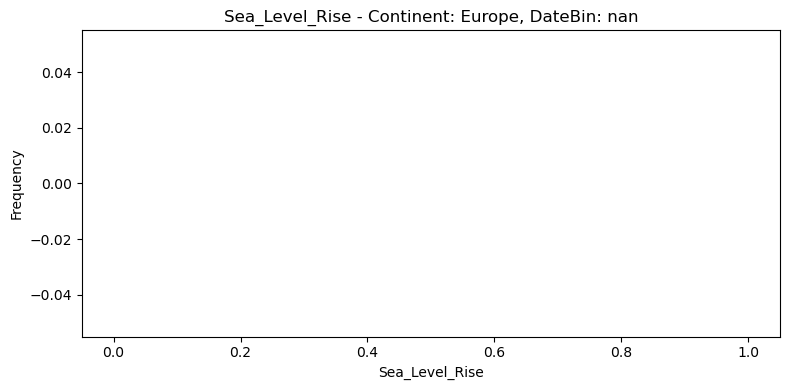

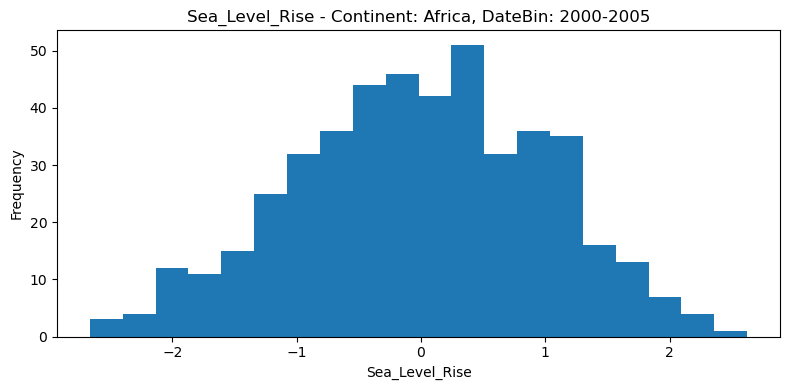

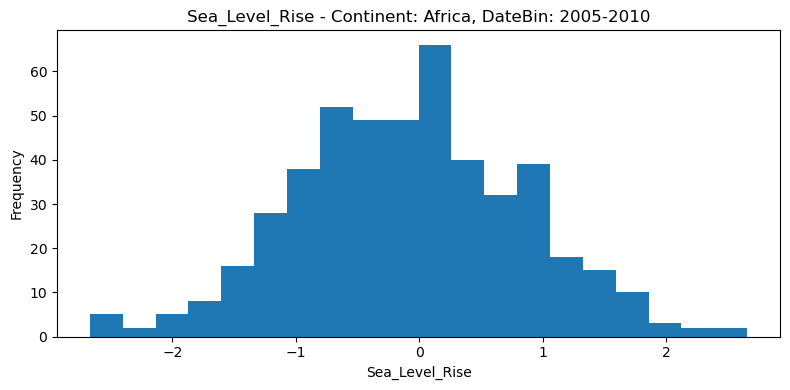

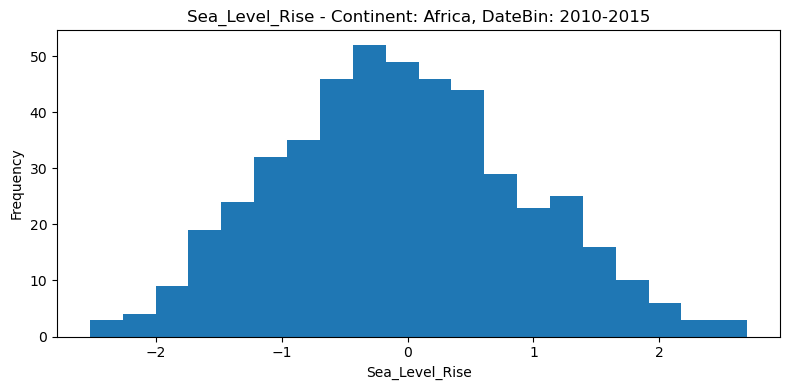

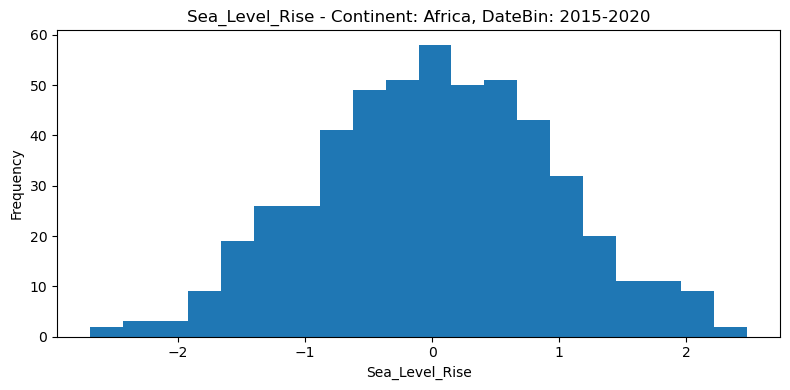

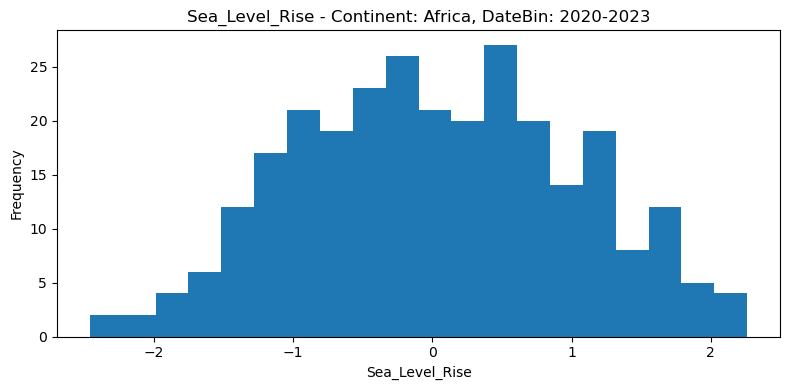

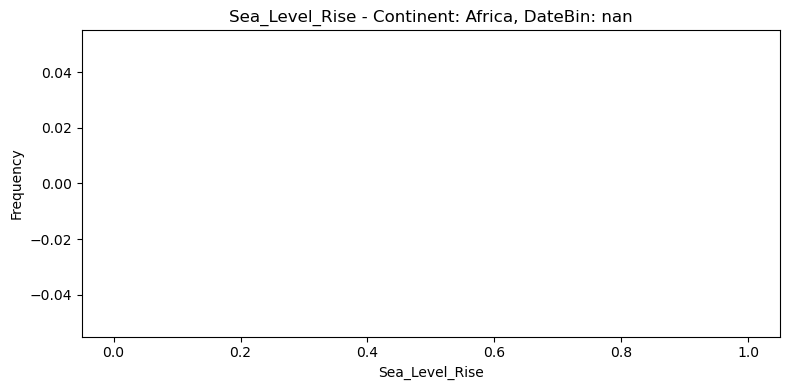

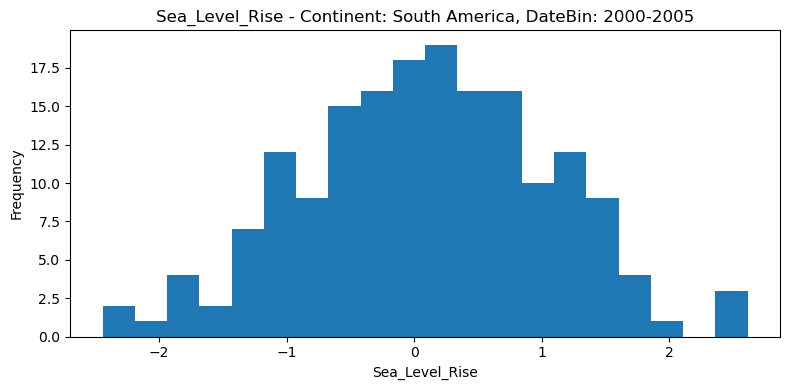

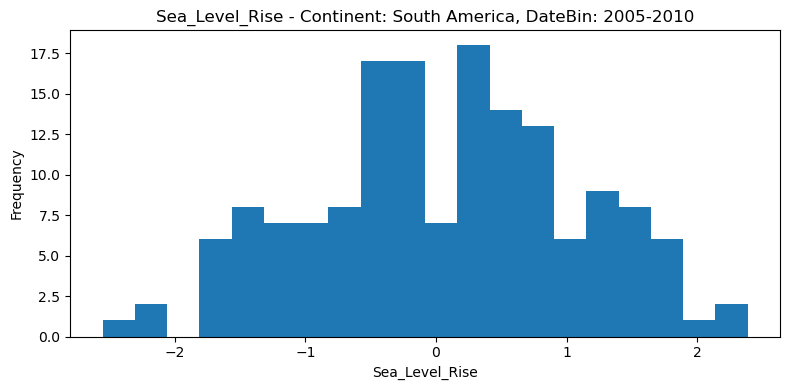

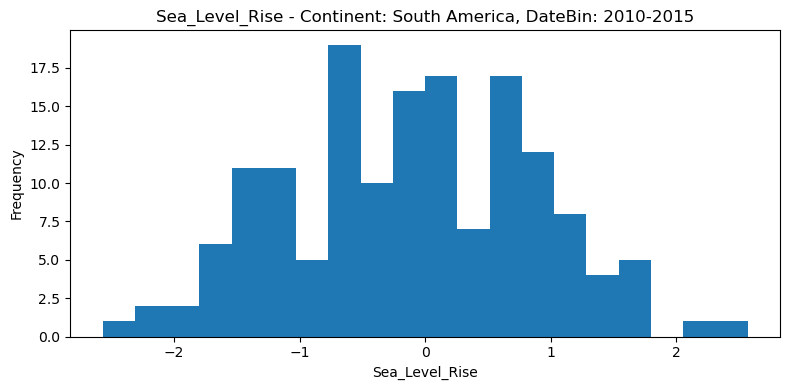

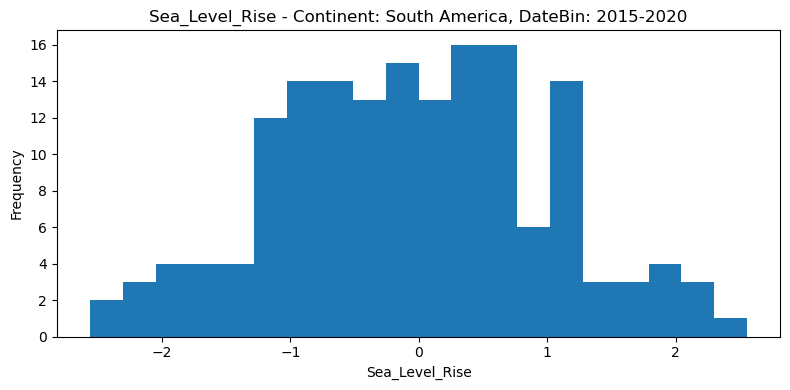

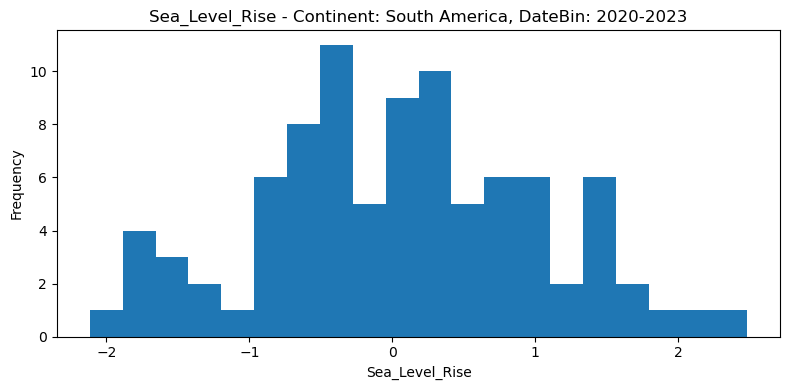

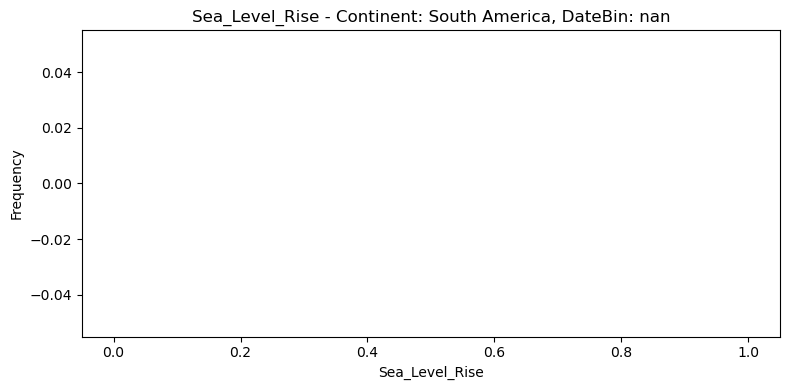

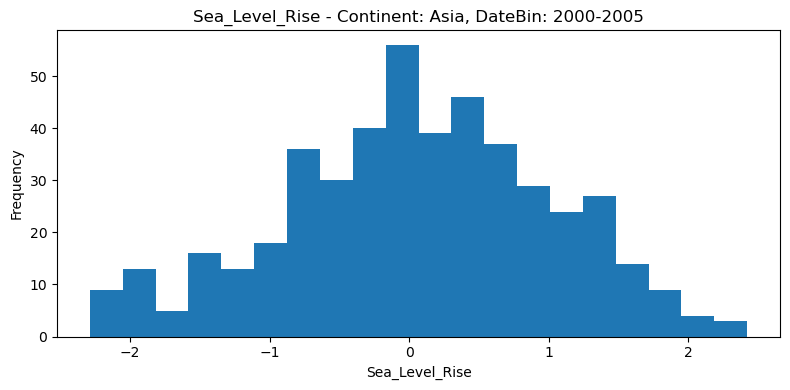

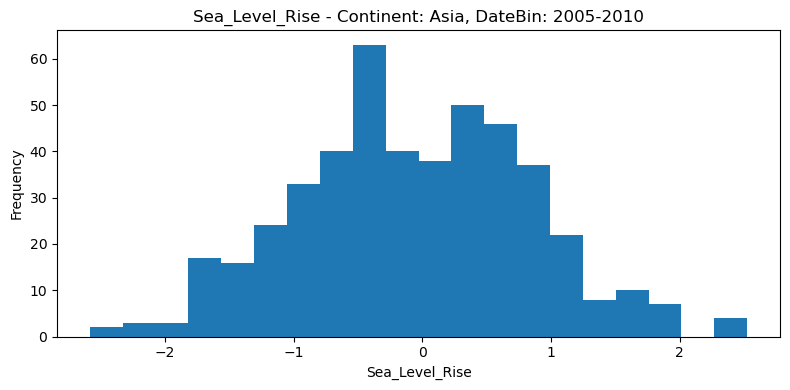

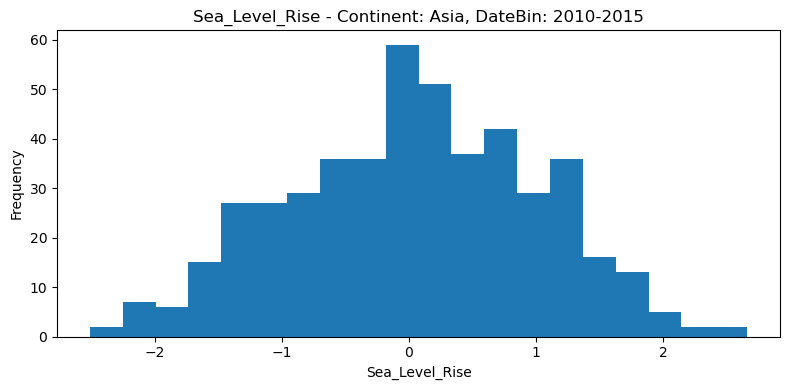

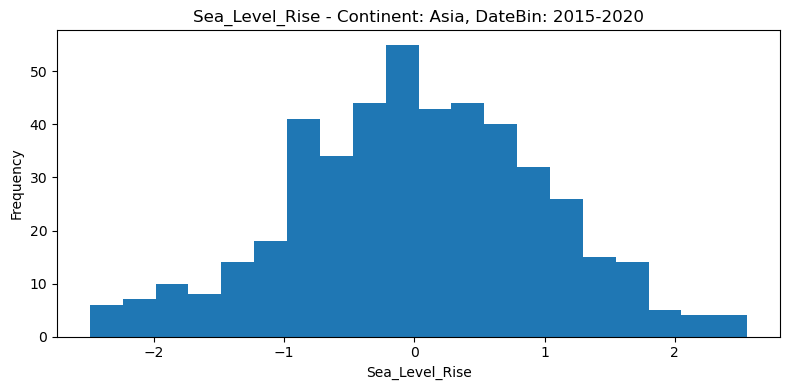

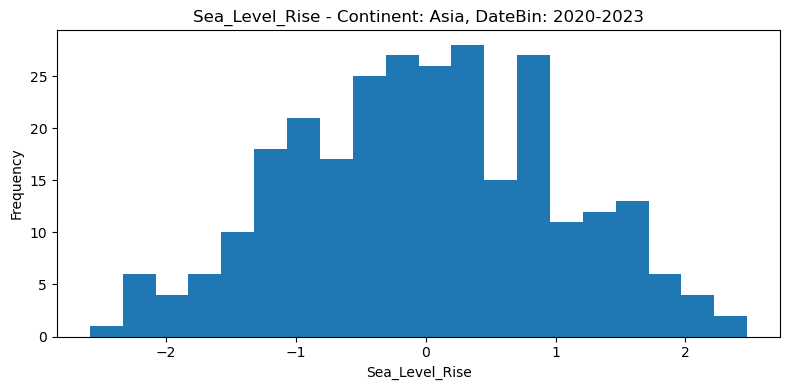

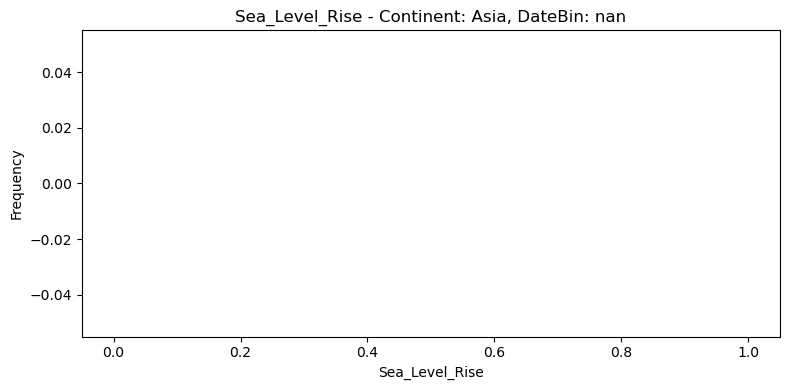

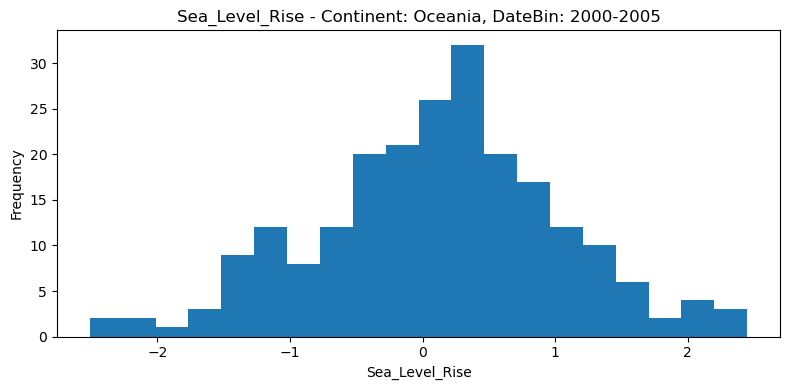

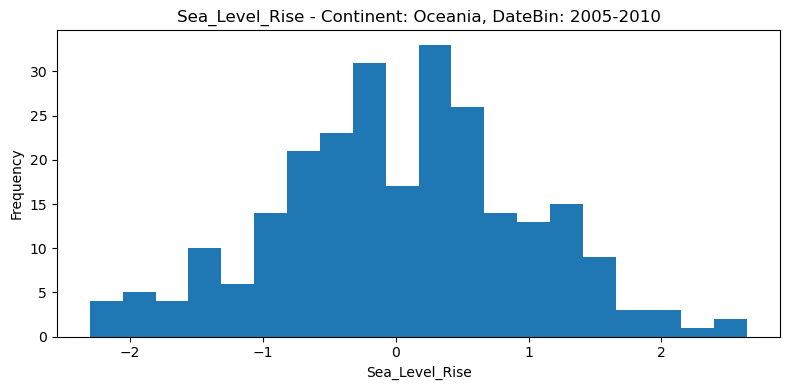

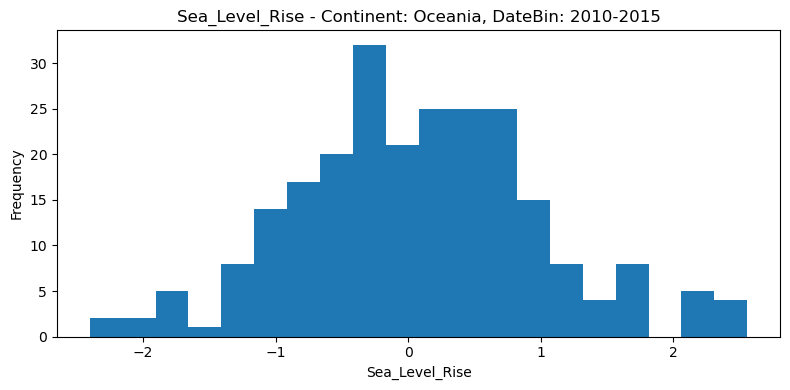

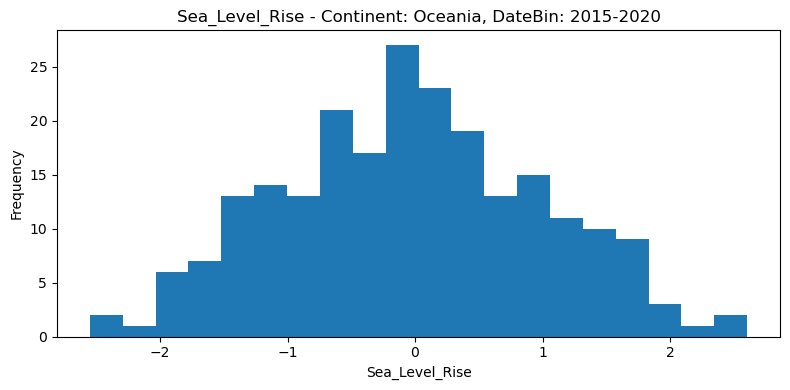

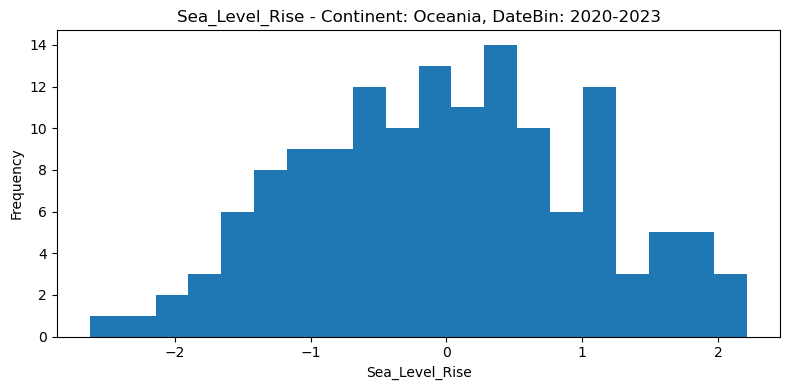

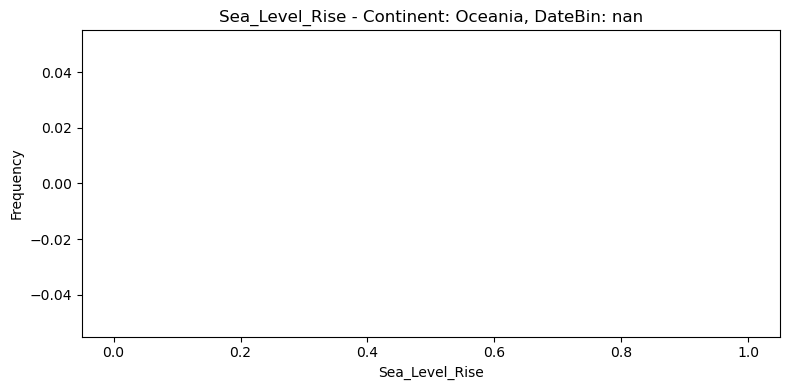

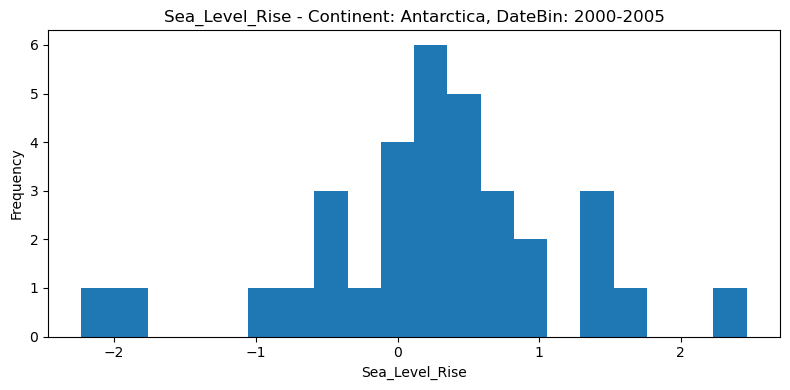

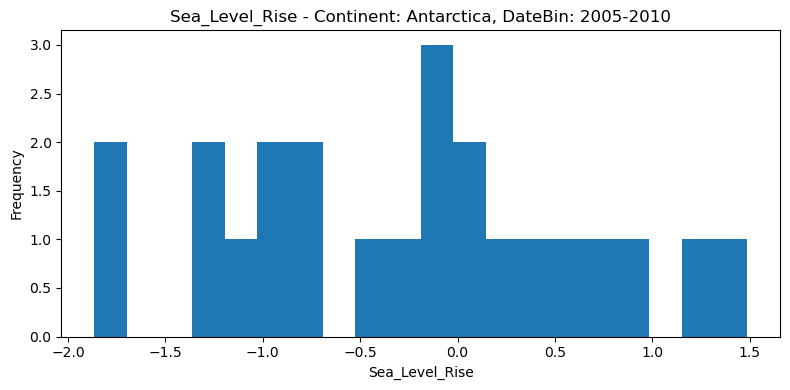

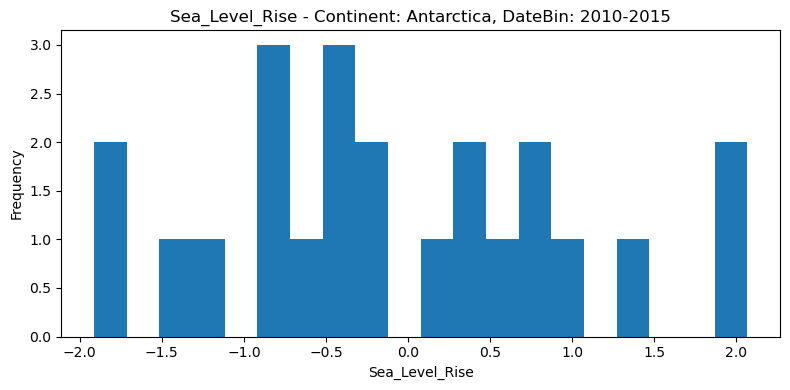

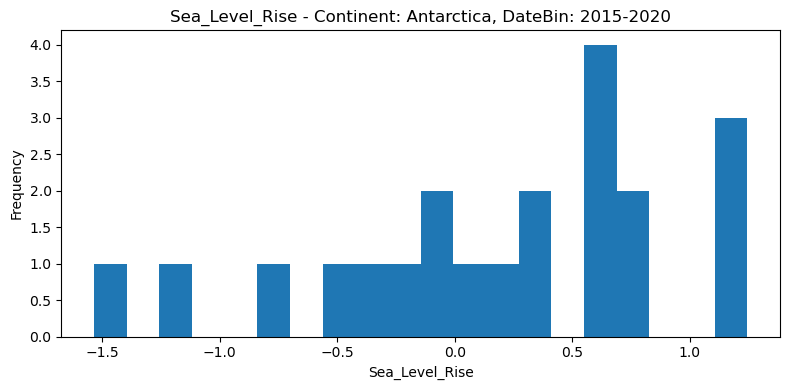

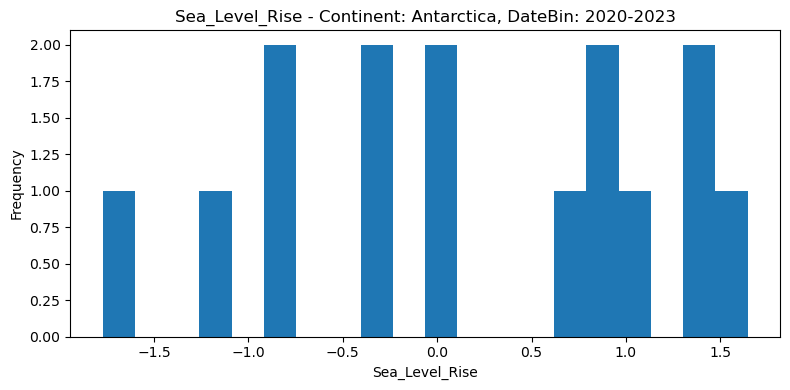

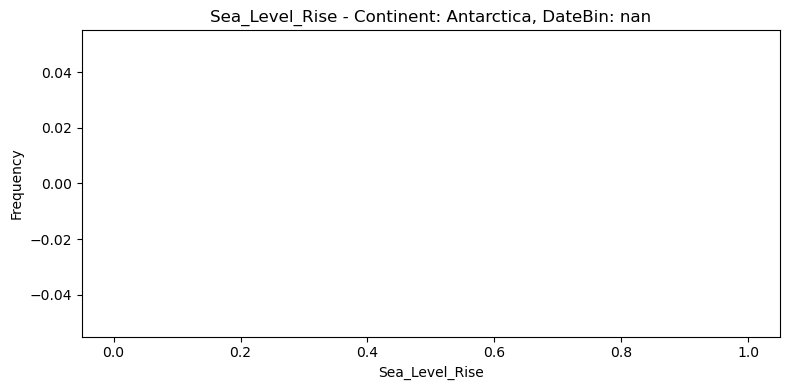

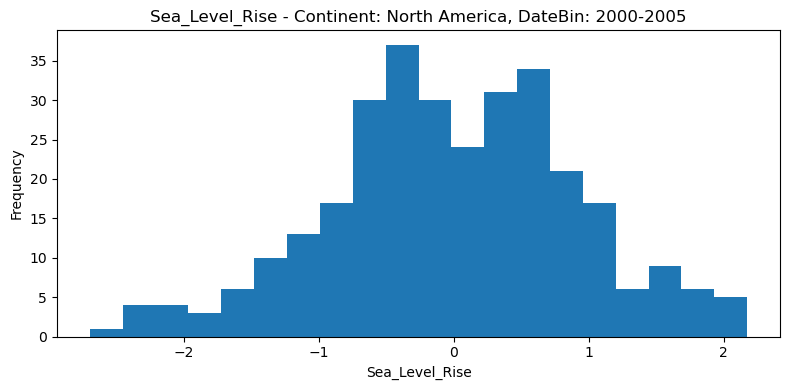

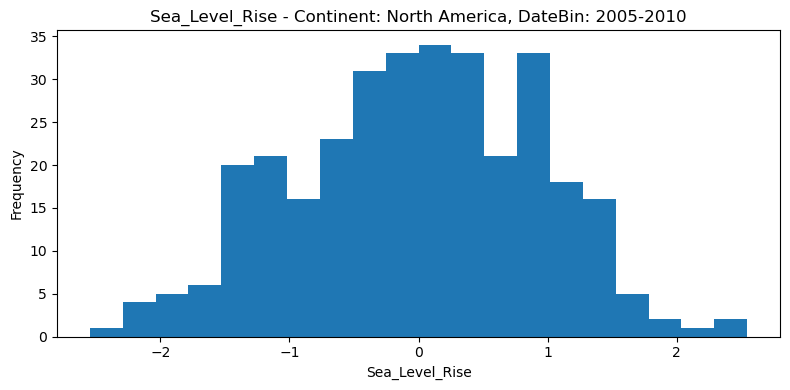

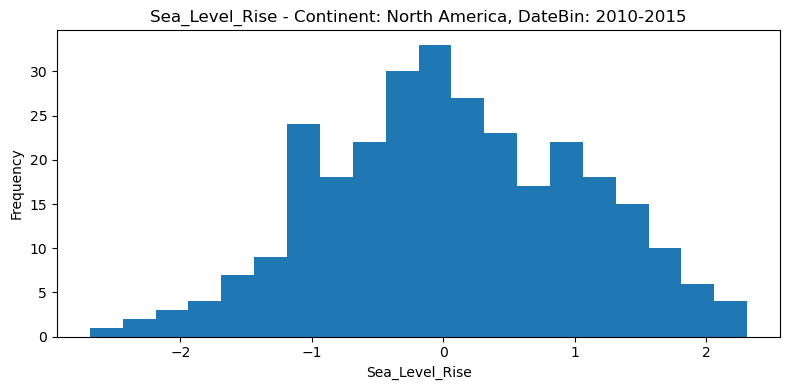

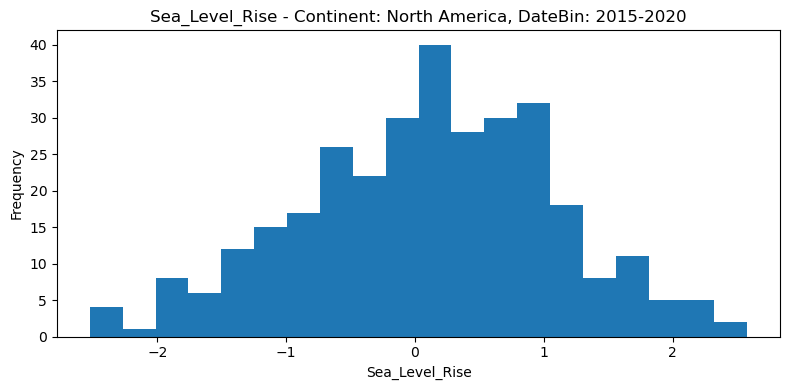

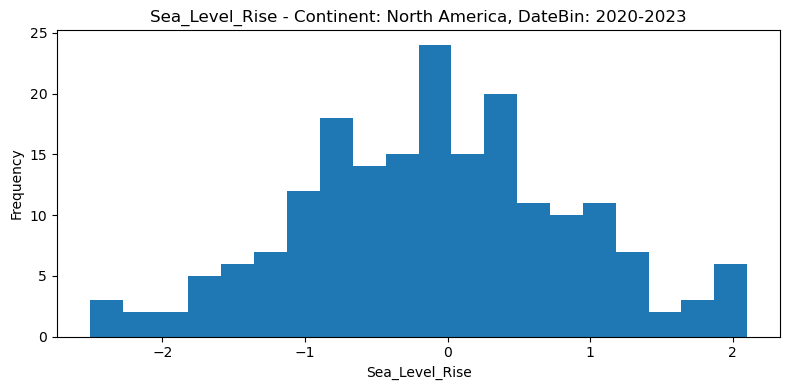

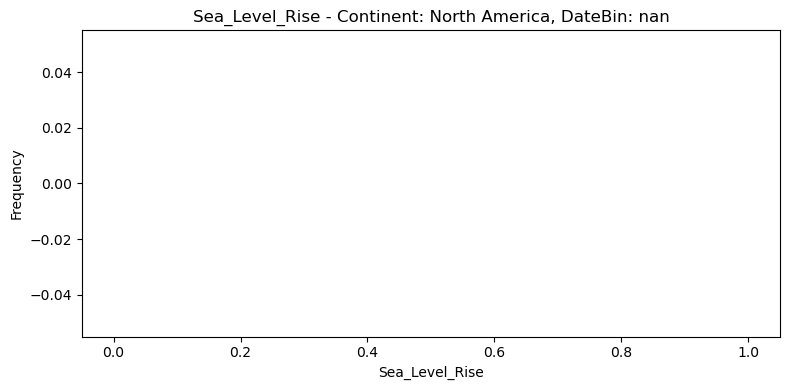

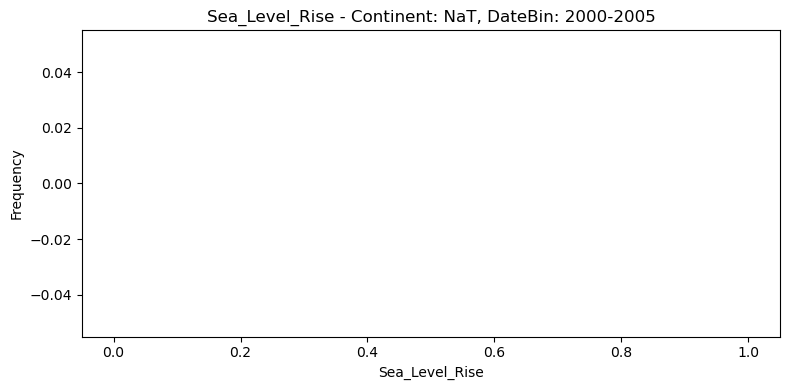

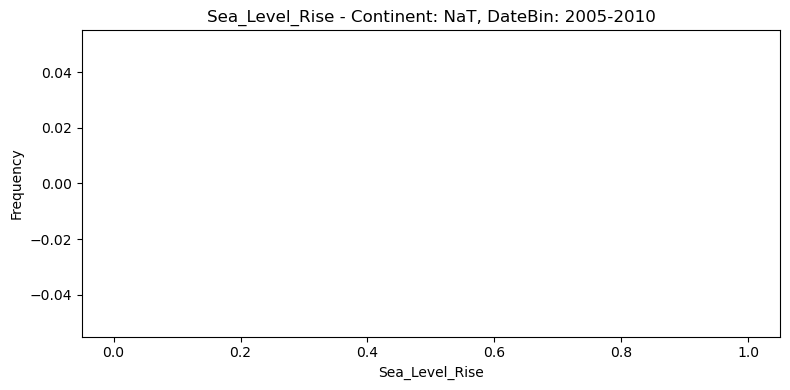

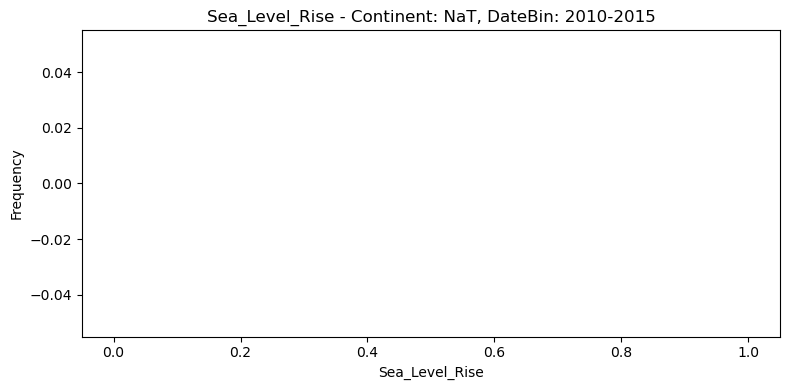

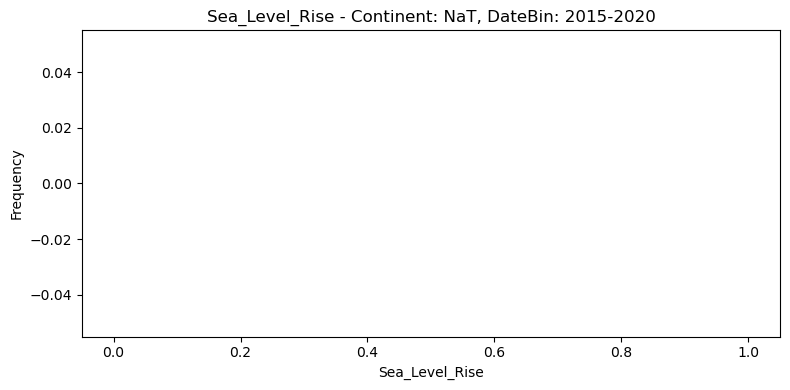

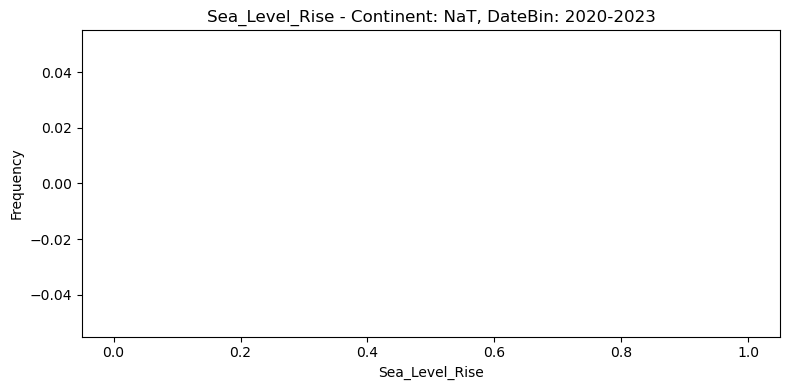

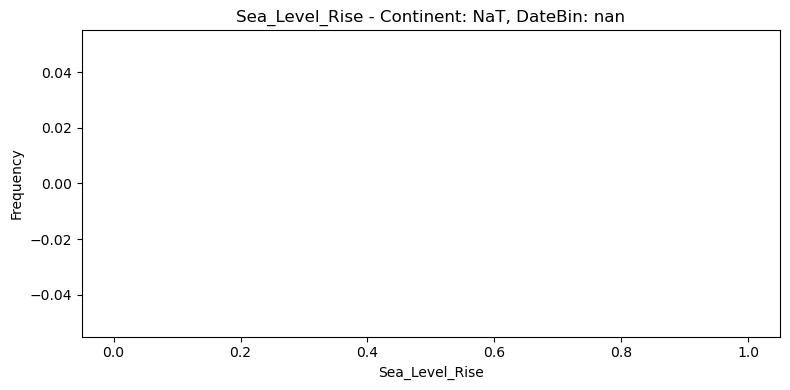

In [170]:
#and finally, sea level change, by datebin, continent, and month

# Convert the 'Date' column to a datetime type if it's not already
merged_df.loc['Date'] = pd.to_datetime(merged_df.loc['Date'])

# Create a new column 'Month' to extract the month from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month

# Define the variables you want to plot
variables = ['Sea_Level_Rise']

# Create subplots for each combination of Continent, DateBin, and Month
for variable in variables:
    for continent in merged_df['Continent'].unique():
        for datebin in merged_df['DateBins'].unique():
            plt.figure(figsize=(8, 4))
            plt.hist(merged_df[
                (merged_df['Continent'] == continent) &
                (merged_df['DateBins'] == datebin)
            ][variable], bins=20)
            plt.title(f'{variable} - Continent: {continent}, DateBin: {datebin}')
            plt.xlabel(variable)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()

#Antarctica looks very weird! Again!

In [137]:
#Calculate Z-scores for numeric columns to identify data points that are significantly different from the mean. 
#Values with Z-scores beyond a certain threshold (ex., ±2 or ±3) may be considered outliers.
from scipy import stats
z_scores = np.abs(stats.zscore(merged_df[['Temperature', 'CO2_Emissions', 'Sea_Level_Rise']]))
outliers = (z_scores > 2).all(axis=1)
merged_df[outliers]
#is East Meganshire	a place in Bahrain? That doesn't seem right...
#30 C seems like a fair temp for that part of the world, but NOT for Jan. 
#I looked up the temperature ranges for Bahrain in 2002, and nothing that hot was recorded
#Conclusion: This entry is a bit bogus!

Date         Location  Country  Temperature  \
895 2002-01-06 18:05:17.551755168  East Meganshire  Bahrain    30.556774   

     CO2_Emissions  Sea_Level_Rise  Precipitation   Humidity  Wind_Speed  \
895     283.716379        2.404841      76.699991  80.005142   25.268714   

      DateBins Continent  
895  2000-2005      Asia

In [164]:
#time to drop that bogus entry! bye bye fictional East Meganshire!
merged_df = merged_df[~outliers]

In [140]:
#Use the IQR method, or interquartile range, to detect outliers, especially if the data doesn't follow a normal distribution. 
pd.set_option('display.max_rows', None)

Q1 = merged_df[['Temperature', 'CO2_Emissions', 'Sea_Level_Rise']].quantile(0.25)
Q3 = merged_df[['Temperature', 'CO2_Emissions', 'Sea_Level_Rise']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((merged_df[['Temperature', 'CO2_Emissions', 'Sea_Level_Rise']] < lower_bound) | (merged_df[['Temperature', 'CO2_Emissions', 'Sea_Level_Rise']] > upper_bound)).any(axis=1)

display(merged_df[outliers])  # Use the display function to ensure all rows are shown
#this is a LOT of so-called outliers!
#I am just scared to drop this many, so ....I won't!

Date             Location  \
87    2000-03-11 13:36:33.699369937           Gordonport   
148   2000-04-30 23:19:49.198919892          South Jamie   
164   2000-05-14 09:55:21.332133212         New Kathleen   
213   2000-06-23 17:41:57.731773176      New Monicamouth   
233   2000-07-10 12:56:22.898289828           Justinview   
235   2000-07-12 05:15:49.414941492            Johnshire   
293   2000-08-29 22:39:38.397839784           Harperport   
369   2000-10-30 06:29:16.255625560    South Jeffreyfort   
425   2000-12-15 11:23:55.463546352       West Davidberg   
452   2001-01-06 07:36:40.180018000     Port Matthewfort   
491   2001-02-07 05:46:03.996399636       Lake Leahburgh   
555   2001-04-02 00:08:12.529252920          Moraborough   
558   2001-04-04 12:37:22.304230424           Brendabury   
578   2001-04-21 07:51:47.470747072             Adamland   
631   2001-06-04 00:17:16.903690368     South Lindamouth   
646   2001-06-16 14:43:05.778577856        South William   
661   2001-06-29 05:08:54.653465344            Codymouth   
698   2001-07-29 10:58:51.953195320         Colleenburgh   
758   2001-09-16 04:22:40.936093608             Longfort   
873   2001-12-19 06:31:25.868586856          Wilsonshire   
895   2002-01-06 18:05:17.551755168      East Meganshire   
921   2002-01-28 14:18:02.268226816        South Natasha   
951   2002-02-21 22:59:56.759675960    Port Michaelshire   
955   2002-02-25 07:38:49.792979296            Frostfort   
965   2002-03-05 17:16:02.376237616         East Natalie   
975   2002-03-14 02:53:14.959495944      South Alejandra   
1059  2002-05-21 04:00:38.883888384          South Alvin   
1162  2002-08-13 04:12:44.716471648         Kimberlyfurt   
1218  2002-09-29 05:17:07.182718272           East Brent   
1220  2002-09-30 21:36:33.699369936           Malonefort   
1286  2002-11-23 15:58:42.232223216      North Saramouth   
1287  2002-11-23 15:58:42.232223216      North Saramouth   
1418  2003-03-11 04:42:59.297929792           Rachelfurt   
1480  2003-04-30 14:26:14.797479744     West Cynthiaport   
1548  2003-06-25 01:07:49.846984688        North Annport   
1575  2003-07-16 21:20:34.563456336          Josephshire   
1593  2003-08-01 00:15:33.213321328     East Victoriaton   
1617  2003-08-21 04:08:51.413141312          Garrettview   
1682  2003-10-13 02:21:16.687668752      Lake Davidmouth   
1687  2003-10-17 07:09:52.979297920       Lake Jamesside   
1689  2003-10-18 23:29:19.495949584          North Jason   
1692  2003-10-21 11:58:29.270927088    Lake Michelleview   
1703  2003-10-30 17:45:25.112511248            Barryland   
1727  2003-11-19 21:38:43.312331232        New Kellyfort   
1760  2003-12-15 02:30:21.062106208       West Justinton   
1790  2004-01-09 07:21:58.811881184          Conleymouth   
1863  2004-03-08 22:52:10.153015296            Morsetown   
1909  2004-04-15 18:09:36.777677760         Lake Leefurt   
1932  2004-05-05 01:53:11.719171904         Sandersshire   
2040  2004-08-02 23:13:20.360036000        Campbellshire   
2096  2004-09-17 07:58:16.309630944         Nataliehaven   
2246  2005-01-20 12:06:41.800180000    Lake Shelleyburgh   
2272  2005-02-11 08:19:26.516651648         Perezborough   
2295  2005-03-02 16:03:01.458145792          Martinshire   
2296  2005-03-03 12:12:44.716471648      East Joshuaview   
2304  2005-03-10 05:30:30.783078304          Shellyshire   
2572  2005-10-16 07:57:24.464446432         Lake Vanessa   
2579  2005-10-22 05:05:27.272727264           West Roger   
2749  2006-03-11 12:08:51.413141312           West Louis   
2762  2006-03-20 17:55:47.254725472            East Alex   
2770  2006-03-26 15:03:50.063006272          Port Robert   
2781  2006-04-04 20:50:45.904590432     East Colleenside   
2901  2006-07-12 23:57:50.387038688        Lake Johnbury   
2940  2006-08-13 22:07:14.203420320         Richardshire   
3007  2006-10-05 20:19:39.477947776             New Jose   
3022  2006-10-18 10:45:28.352835264     Port Andrewburgh   
3100  2006-

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [47]:
# Checking for duplicates
duplicate_rows_df = merged_df[merged_df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (237, 11)


In [48]:
# Increase the maximum number of rows displayed so that I can see more of the duplicate rows and determine if they're really dupes
pd.set_option('display.max_rows', None)

duplicates = merged_df[merged_df.duplicated(keep=False)]
print(duplicates)

# Reset the maximum number of rows displayed to the default 
pd.reset_option('display.max_rows')

#conclusion: yes, these are definitely dupes, and I can safely drop them

                               Date              Location  \
2     2000-01-02 16:19:26.516651665      West Williamland   
3     2000-01-02 16:19:26.516651665      West Williamland   
39    2000-02-01 22:09:23.816381638           Duncanmouth   
40    2000-02-01 22:09:23.816381638           Duncanmouth   
77    2000-03-04 00:09:04.374437443        New Sandrafurt   
78    2000-03-04 00:09:04.374437443        New Sandrafurt   
116   2000-04-04 22:18:28.190819081            Wellsville   
117   2000-04-04 22:18:28.190819081            Wellsville   
194   2000-06-08 14:46:59.081908190         Thompsonshire   
195   2000-06-08 14:46:59.081908190         Thompsonshire   
328   2000-09-28 08:19:52.439243924        East Sandyside   
329   2000-09-28 08:19:52.439243924        East Sandyside   
332   2000-09-30 20:49:02.214221420          East Christy   
333   2000-09-30 20:49:02.214221420          East Christy   
357   2000-10-21 00:42:20.414041404          Jenniferfurt   
358   2000-10-21 00:42:2

In [193]:
#drop duplicates
merged_df.drop_duplicates(inplace=True)


In [195]:
#check again to make sure duplicates are gone

duplicate_rows_df = merged_df[merged_df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (0, 11)


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [202]:
#check for weird spikes, mostly in Antarctica based on the previous charts


# Filter the DataFrame for rows where 'Continent' is 'Antarctica'
antarctica_data = merged_df[merged_df['Continent'] == 'Antarctica']

# Find the minimum and maximum temperature in the filtered data
min_temp = antarctica_data['Temperature'].min()
max_temp = antarctica_data['Temperature'].max()

print(f"Minimum Temperature in Antarctica: {min_temp}°C")
print(f"Maximum Temperature in Antarctica: {max_temp}°C")

#the results show a max high temp in Antarctica as 24, but the maximum recorded temp there has never gone beyond 18.4 degrees.
#therefore, this data is wonky

Minimum Temperature in Antarctica: 4.506455529245679°C
Maximum Temperature in Antarctica: 24.78065227006721°C


In [203]:
#doing it again for the sea level change

# Filter the DataFrame for rows where 'Continent' is 'Antarctica'
antarctica_data = merged_df[merged_df['Continent'] == 'Antarctica']

# Find the minimum and maximum sea level rise in the filtered data
min_sea_level_rise = antarctica_data['Sea_Level_Rise'].min()
max_sea_level_rise = antarctica_data['Sea_Level_Rise'].max()

print(f"Minimum Sea Level Rise in Antarctica: {min_sea_level_rise} mm")
print(f"Maximum Sea Level Rise in Antarctica: {max_sea_level_rise} mm")

#this seems more normal, but it's still misleading, and too big
#since sea level rise around Antarctica is about 3.2 mm, and this is closer to 5

Minimum Sea Level Rise in Antarctica: -2.9659082013261044 mm
Maximum Sea Level Rise in Antarctica: 2.4651622823059647 mm


In [205]:
#one more time for carbon emissions

# Filter the DataFrame for rows where 'Continent' is 'Antarctica'
antarctica_data = merged_df[merged_df['Continent'] == 'Antarctica']

# Find the minimum and maximum CO2 emissions in the filtered data
min_co2_emissions = antarctica_data['CO2_Emissions'].min()
max_co2_emissions = antarctica_data['CO2_Emissions'].max()

print(f"Minimum CO2 Emissions in Antarctica: {min_co2_emissions} parts per million")
print(f"Maximum CO2 Emissions in Antarctica: {max_co2_emissions} parts per million")

#carbon emissions around antarctica have been detected beyonf 400 parts per million;
#but emissions of over 500 ppm from a mostly uninhabited continent seems really off


Minimum CO2 Emissions in Antarctica: 272.3770715391981 parts per million
Maximum CO2 Emissions in Antarctica: 541.7594747985402 parts per million


In [208]:
#checking carbon emissions in Europe to compare

# Filter the DataFrame for rows where 'Continent' is 'Antarctica'
europe_data = merged_df[merged_df['Continent'] == 'Europe']

# Find the minimum and maximum CO2 emissions in the filtered data
min_co2_emissions = europe_data['CO2_Emissions'].min()
max_co2_emissions = europe_data['CO2_Emissions'].max()

print(f"Minimum CO2 Emissions in Europe: {min_co2_emissions} metric tons")
print(f"Maximum CO2 Emissions in Europe: {max_co2_emissions} metric tons")

#there is abslolutely no reason that Antarctica's ppm should be on par with industrialized and highly populated Europe!

Minimum CO2 Emissions in Europe: 226.37025027681872 metric tons
Maximum CO2 Emissions in Europe: 550.6868419410998 metric tons


In [201]:
merged_df.dtypes
#checking to make sure the data types and their respective columns make sense

Date              datetime64[ns]
Location                  object
Country                   object
Temperature              float64
CO2_Emissions            float64
Sea_Level_Rise           float64
Precipitation            float64
Humidity                 float64
Wind_Speed               float64
DateBins                category
Continent                 object
dtype: object

In [198]:
#check missing values
merged_df.isna().sum()


Date              0
Location          0
Country           0
Temperature       0
CO2_Emissions     0
Sea_Level_Rise    0
Precipitation     0
Humidity          0
Wind_Speed        0
DateBins          0
Continent         0
dtype: int64

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?

Missing Data:I did have missing data, a small cluster of rows that didn't have entries in the DateBins column. This was because my original code failed to capture some of the dates. Once I figured that out, I made sure that the new code got everything between (and including!) first and last dates. This eliminated all my missing data! So I did not need to drop those rows or impute the value into those empty cells. So missing data is a "Well yes, but no".

Outliers: Boy did I! I found a lot of outliers in the CO2 emissions, but most of the outliers were evenly distributed and symmetrical...except for ONE data point! Still, I decided to leave it as is. 

Then I found an entry that doesn't make sense. 30 C is possible for Bahrain, even in winter, but it is rare; and when I looked up the temperature records for that month in that year, nothing that high was recorded. Also, in that one entry, it lists a city that doesn't exist in Bahrain. So that row needs to go!

I did a lot of playing around with histograms and trying to find a way to define what was enough of an outlier for me to toss, but in the end, I only tossed one row.

Unneccessary Data: Because the data from Antarctica is so inconsistent, and also so spare compared to other continents, arguably it distorts the data set and is the outlier. 

Inconsistent Data: I did not find inconsistent data entry, which is part of what I was looking for when looking for missing data. What a relief!

However, there is just not a lot of data from Antarctica, so that could be considered inconsistent or missing data, and it affects the relative weight of that data from the continent versus other locations.  Also, the data from Antarctica was very wonky, and had extreme spikes compared to the data from the other continents. SOme of the numbers there just don't make any sense.

I did notice that the bell curves mostly stayed in the center, when I expected them to drift to one side over time. 

2. Did the process of cleaning your data give you new insights into your dataset?

I definitely cannot fact-check every entry, but it would be nice if someone did! I was spooked by the East Meghanshire in Bahrain entry, because that definitely wasn't right!

I realized how little data there is from Antarctica compared to everything else in the dataset. The data from that continent is also very wonky.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

Because there isn't a lot of data from Antarctica, I think it is wise to keep the data "binned" according to continent and not just date groups, so that it doesn't distort the results.

Or, because of how unreliable the data from Antarctica is, I may choose to drop it from the dataset altogether or otherwise ignore it altogether.